# Imports

In [1]:
import ebooklib
from ebooklib import epub
from bs4 import BeautifulSoup
import re
import requests
import nltk
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
import pandas as pd
import numpy as np
from glob import glob
import configparser
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag

# Scraping all of the Supreme Court Cases

## Dred Scott v. Sandford

In [12]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/60/393'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [13]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [14]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

60 U.S. 393
19 How. 393
15 L.Ed. 691
DRED SCOTT, PLAINTIFF IN ERROR,
v.
JOHN F. A. SANDFORD.
December Term, 1856
[Syllabus from pages 393-395 intentionally omitted]
THIS case was brought up, by writ of error, from the Circuit Court of the United States for the district of Missouri.
It was an action of trespass


In [15]:
with open('dredvsandford.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [149]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/dredvsandford.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/dredvsandford_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/dredvsandford_processed.txt


## Plessy v. Ferguson

In [35]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/163/537'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [36]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [41]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

163 U.S. 537
16 S.Ct. 1138
41 L.Ed. 256
PLESSY
v.
FERGUSON.
No. 210.
May 18, 1896.
1
This case turns upon the constitutionality of an act of the general assembly of the state of Louisiana, passed in 1890, providing for separate railway carriages for the white and colored races. Acts 1890, No. 111, p. 152.


In [38]:
with open('pvferguson.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [150]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/pvferguson.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/pvferguson_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/pvferguson_processed.txt


## Loving v. Virginia

In [42]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/388/1'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [43]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [44]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

388 U.S. 1
87 S.Ct. 1817
18 L.Ed.2d 1010
Richard Perry LOVING et ux., Appellants,
v.
COMMONWEALTH OF VIRGINIA.
No. 395.
Argued April 10, 1967.
Decided June 12, 1967.
Philip J. Hirschkop, pro hac vice, by special leave of Court, Bernard S. Cohen, Alexandria, Va., for appellants.


In [45]:
with open('lvvirginia.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [152]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/lvvirginia.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/lvvirginia_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/lvvirginia_processed.txt


## Regents of the University of California v. Bakke

In [46]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/438/265'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [47]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [48]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

438 U.S. 265
98 S.Ct. 2733
57 L.Ed.2d 750
REGENTS OF the UNIVERSITY OF CALIFORNIA, Petitioner,
v.
Allan BAKKE.
No. 76-811.
Argued Oct. 12, 1977.
Decided June 28, 1978.
Syllabus


In [49]:
with open('regentsvbakke.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [153]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/rvbakke.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/rvbakke_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/rvbakke_processed.txt


## Korematsu v. United States

In [50]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/323/214'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [51]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [52]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

323 U.S. 214
65 S.Ct. 193
89 L.Ed. 194
TOYOSABURO KOREMATSU
v.
UNITED STATES.
No. 22.
Argued Oct. 11, 12, 1944.
Decided Dec. 18, 1944.
Rehearing Denied Feb. 12, 1945.


In [53]:
with open('korematsuvus.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [154]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/korematsuvus.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/korematsuvus_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/korematsuvus_processed.txt


## Smith v. Allwright

In [54]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/321/649'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [55]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [56]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

321 U.S. 649
64 S.Ct. 757
88 L.Ed. 987
SMITH
v.
ALLWRIGHT, Election Judge, et al.
No. 51.
Reargued Jan. 12, 1944.
Decided April 3, 1944.
As Amended June 12, 1944.


In [57]:
with open('smithvallwright.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [155]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/smithvallwright.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/smithvallwright_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/smithvallwright_processed.txt


## Sweatt v. Painter

In [58]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/339/629'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [59]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [60]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

339 U.S. 629
70 S.Ct. 848
94 L.Ed. 1114
SWEATT
v.
PAINTER et al.
No. 44.
Argued April 4, 1950.
Decided June 5, 1950.
Rehearing Denied Oct. 9, 1950.


In [61]:
with open('sweattvpainter.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [156]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/sweattvpainter.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/sweattvpainter_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/sweattvpainter_processed.txt


## Heart of Atlanta Motel, Inc. v. United States

In [62]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/379/241'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [63]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [64]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

379 U.S. 241
85 S.Ct. 348
13 L.Ed.2d 258
HEART OF ATLANTA MOTEL, INC., Appellant,
v.
UNITED STATES et al.
No. 515.
Argued Oct. 5, 1964.
Decided Dec. 14, 1964.
Moreton Rolleston, Jr., Atlanta, Ga., for appellant.


In [65]:
with open('heartofatlantamotelvus.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [157]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/heartofatlantamotelvus.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/heartofatlantamotelvus_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/heartofatlantamotelvus_processed.txt


## Griggs v. Duke Power Co.

In [66]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/401/424'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [67]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [68]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

401 U.S. 424
91 S.Ct. 849
28 L.Ed.2d 158
Willie S. GRIGGS et al., Petitioners,
v.
DUKE POWER COMPANY.
No. 124.
Argued Dec. 14, 1970.
Decided March 8, 1971.
Jack Greenberg, New York City, for petitioners.


In [69]:
with open('griggsvduke.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [158]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/griggsvduke.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/griggsvduke_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/griggsvduke_processed.txt


## Parker v. Riley

In [70]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/250/66'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [71]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [72]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

250 U.S. 66
39 S.Ct. 405
63 L.Ed. 847
PARKER, Superintendent for Five Civilized Tribes, et al.
v.
RILEY et al.
No. 254.
Submitted March 19, 1919.
Decided May 19, 1919.
Mr. Assistant Attorney General Kearful,


In [73]:
with open('parkervriley.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [159]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/parkervriley.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/parkervriley_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/parkervriley_processed.txt


## McCarthy v. Philadelphia Civil Service Commission

In [74]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/424/645'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [75]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [76]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

424 U.S. 645
96 S.Ct. 1154
47 L.Ed.2d 366
Francis McCARTHY,
v.
PHILADELPHIA CIVIL SERVICE COMMISSION.
No. 75-783.
March 22, 1976.
PER CURIAM.
1


In [77]:
with open('mccarthyvphiladelphia.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [160]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/mccarthyvphiladelphia.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/mccarthyvphiladelphia_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/mccarthyvphiladelphia_processed.txt


## Norris v. Alabama

In [723]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/294/587'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [724]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [725]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

294 U.S. 587
55 S.Ct. 579
79 L.Ed. 1074
NORRIS
v.
STATE OF ALABAMA.
No. 534.
Argued Feb. 15—18, 1935.
Decided April 1, 1935.
Mr. Samuel S. Leibowitz, of New York City (Messrs. Walter H. Pollak, Osmond K. Fraenkel, and Carl S. Stern, all of New York City, on the brief), for petitioner.


In [726]:
with open('norrisvalabama.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [728]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/norrisvalabama.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/norrisvalabama_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/norrisvalabama_processed.txt


## Strauder v. West Virginia

In [730]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/100/303'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [731]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [732]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

100 U.S. 303
100 U.S. 303
25 L.Ed. 664
STRAUDER
v.
WEST VIRGINIA.
October Term, 1879
ERROR to the Supreme Court of Appeals of the State of West Virginia.
The facts are stated in the opinion of the court.
Mr. Charles Devens


In [733]:
with open('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/straudervwv.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [734]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/straudervwv.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/straudervwv_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/straudervwv_processed.txt


## Neal v. Delaware

In [735]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/103/370#:~:text=v.-,DELAWARE.,limited%20to%20the%20white%20race.'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [736]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [737]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

103 U.S. 370
103 U.S. 370
26 L.Ed. 567
NEAL
v.
DELAWARE.
October 1880.
1
1. The adoption of the
Fifteenth Amendment


In [738]:
with open('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/nealvdelaware.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [740]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/nealvdelaware.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/nealvdelaware_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/nealvdelaware_processed.txt


## Grutter v. Bollinger

In [745]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supct/html/02-241.ZO.html'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [746]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [747]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

This case requires us to decide whether the use of race as a factor in student admissions by the University of Michigan Law School (Law School) is unlawful.


In [744]:
with open('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/gruttervbollinger.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [914]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/gruttervbollinger.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/gruttervbollinger_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/gruttervbollinger_processed.txt


## Shelley v. Kraemer

In [750]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/334/1'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [751]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [752]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

334 U.S. 1
68 S.Ct. 836
92 L.Ed. 1161
SHELLEY et ux.
v.
KRAEMER et ux.  McGHEE et ux.  v.  SIPES et al.
Nos. 72, 87.
Argued Jan. 15, 16, 1948.
Decided May 3, 1948.
Messrs. George L. Vaughn and Herman Willer, both of St. Louis, Mo., for petitioners Shelley.


In [753]:
with open('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/shelleyvkraemer.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [755]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/shelleyvkraemer.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/shelleyvkraemer_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/shelleyvkraemer_processed.txt


## Shaw v. Reno

In [756]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/509/630'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [757]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [758]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

509 U.S. 630
113 S.Ct. 2816
125 L.Ed.2d 511
Ruth O. SHAW, et al., Appellants
v.
Janet RENO, Attorney General, et al.
No. 92-357.
Argued April 20, 1993.
Decided June 28, 1993.
Syllabus


In [759]:
with open('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/shawvreno.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [779]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/shawvreno.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/shawvreno_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/shawvreno_processed.txt


## Fisher v. University of Texas

In [761]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/11-345'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [762]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [763]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

NOTE: Where it is feasible, a syllabus (headnote) will be released, as is being done in connection with this case, at the time the opinion is issued. The syllabus constitutes no part of the opinion of the Court but has been prepared by the Reporter of Decisions for the convenience of the reader. See
United States
v.
Detroit Timber & Lumber Co.,
200 U. S. 321
, 337.
SUPREME COURT OF THE UNITED STATES
Syllabus
FISHER
v


In [764]:
with open('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/fishervut.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [766]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/fishervut.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/fishervut_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/fishervut_processed.txt


## BOARD OF EDUCATION OF OKLAHOMA CITY PUBLIC SCHOOLS v. DOWELL

In [768]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/498/237'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [769]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [770]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

498 U.S. 237
111 S.Ct. 630
112 L.Ed.2d 715
BOARD OF EDUCATION OF OKLAHOMA CITY  PUBLIC SCHOOLS, INDEPENDENT SCHOOL DISTRICT  NO. 89, OKLAHOMA COUNTY, OKLAHOMA, Petitioner,
v.
Robert L. DOWELL, et al.
No. 89-1080.
Argued Oct. 2, 1990.
Decided Jan. 15, 1991.
Syllabus


In [771]:
with open('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/oklahomacityvdowell.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [773]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/oklahomacityvdowell.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/oklahomacityvdowell_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/oklahomacityvdowell_processed.txt


## Jones v. Mayer

In [774]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/392/409'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [775]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [776]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

20 L.Ed.2d 1189
88 S.Ct. 2186
392 U.S. 409
Joseph Lee JONES et ux., Petitioners,
v.
ALFRED H. MAYER CO. et al.
No. 645.
Argued April 1 and 2, 1968.
Decided June 17, 1968.
[Syllabus from pages 409-410 intentionally omitted]


In [777]:
with open('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/jonesvmayer.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [780]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/jonesvmayer.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/jonesvmayer_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/jonesvmayer_processed.txt


## Adarand Constructors v. Pena

In [781]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/515/200'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [782]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [783]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

515 U.S. 200
115 S.Ct. 2097
132 L.Ed.2d 158
ADARAND CONSTRUCTORS, INC., Petitioner
v.
Federico PENA, Secretary of Transportation, et al.
No. 93-1841.
Supreme Court of the United States
Argued Jan. 17, 1995.
Decided June 12, 1995.


In [784]:
with open('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/adarandvpena.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [785]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/adarandvpena.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/adarandvpena_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/adarandvpena_processed.txt


## Mobile v. Bolden

In [786]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/446/55'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [787]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [788]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

446 U.S. 55
100 S.Ct. 1490
64 L.Ed.2d 47
CITY OF MOBILE, ALABAMA, et al., Appellants,
v.
Wiley L. BOLDEN et al.
No. 77-1844.
Argued March 19, 1979.
Reargued Oct. 29, 1979.
Decided April 22, 1980.


In [789]:
with open('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/mobilevbolden.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [790]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/mobilevbolden.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/mobilevbolden_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/mobilevbolden_processed.txt


## Swann v. Charlotte-Mecklenburg

In [805]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/402/1'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [806]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [807]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

402 U.S. 1
91 S.Ct. 1267
28 L.Ed.2d 554
James E. SWANN et al., Petitioners,
v.
CHARLOTTE-MECKLENBURG BOARD OF EDUCATION et al.  CHARLOTTE-MECKLENBURG BOARD OF EDUCATION et al.,  Petitioners,  v.  James E. SWANN et al.
Nos. 281, 349.
Argued Oct. 12, 1970.
Decided April 20, 1971.
Rehearing Denied June 7, 1971.


In [808]:
with open('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/swannvcharlotte.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [809]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/swannvcharlotte.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/swannvcharlotte_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/swannvcharlotte_processed.txt


## Allen v. Wright

In [810]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/468/737'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [811]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [812]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

468 U.S. 737
104 S.Ct. 3315
82 L.Ed.2d 556
W. Wayne ALLEN, Petitioner,
v.
Inez WRIGHT, etc., et al. Donald T. REGAN, Secretary of  the Treasury, et al., Petitioner,  v.  Inez WRIGHT, et al.
Nos. 81-757, 81-970.
Supreme Court of the United States
Argued Feb. 29, 1984.
Decided July 3, 1984.


In [813]:
with open('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/allenvwright.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [814]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/allenvwright.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/allenvwright_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/allenvwright_processed.txt


## Metro Broadcasting v. FCC

In [815]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/497/547'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [816]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [817]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

497 U.S. 547
110 S.Ct. 2997
111 L.Ed.2d 445
METRO BROADCASTING, INC., Petitioner,
v.
FEDERAL COMMUNICATIONS COMMISSION, et al.  ASTROLINE COMMUNICATIONS COMPANY LIMITED  PARTNERSHIP, Petitioner,  v.  SHURBERG BROADCASTING OF HARTFORD, INC., et al.
Nos. 89-453, 89-700.
Argued March 28, 1990.
Decided June 27, 1990.
Rehearing Denied in No. 89-453


In [818]:
with open('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/metrovfcc.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [819]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/metrovfcc.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/metrovfcc_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/metrovfcc_processed.txt


## Romer v. Evans

In [820]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/517/620'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [821]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [822]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

517 U.S. 620
116 S.Ct. 1620
134 L.Ed.2d 855
ROMER, GOVERNOR OF COLORADO, et al.
v.
EVANS et al.
Certiorari to the Supreme Court of Colorado.
No. 94-1039.
Supreme Court of the United States
Syllabus


In [823]:
with open('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/romervevans.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [824]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/romervevans.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/romervevans_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/romervevans_processed.txt


## Evans v. Newton

In [825]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/382/296'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [826]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [827]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

382 U.S. 296
86 S.Ct. 486
15 L.Ed.2d 373
E. S. EVANS et al., Petitioners,
v.
Charles E. NEWTON et al.
No. 61.
Argued Nov. 9 and 10, 1965.
Decided Jan. 17, 1966.
Jack Greenberg, New York City, for petitioners.


In [828]:
with open('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/evansvnewton.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [829]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/evansvnewton.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/evansvnewton_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/evansvnewton_processed.txt


## Patterson v. McLean Credit Union

In [844]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/491/164'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [845]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [846]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

491 U.S. 164
109 S.Ct. 2363
105 L.Ed.2d 132
Brenda PATTERSON, Petitioner
v.
McLEAN CREDIT UNION.
No. 87-107.
Argued Feb. 29, 1988.
Reargued Oct. 12, 1988.
Decided June 15, 1989.


In [847]:
with open('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/pattersonvmclean.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [848]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/pattersonvmclean.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/pattersonvmclean_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/pattersonvmclean_processed.txt


## Firefighters v. Stotts

In [849]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/467/561'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [850]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [851]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

467 U.S. 561
104 S.Ct. 2576
81 L.Ed.2d 483
FIREFIGHTERS LOCAL UNION NO. 1784, Petitioner,
v.
Carl W. STOTTS et al.  MEMPHIS FIRE DEPARTMENT et al., Petitioners,  v.  Carl W. STOTTS, etc., et al.
Nos. 82-206, 82-229.
Supreme Court of the United States
Argued Dec. 6, 1983.
Decided June 12, 1984.


In [852]:
with open('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/firefightersvstotts.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [853]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/firefightersvstotts.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/firefightersvstotts_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/firefightersvstotts_processed.txt


## Lugar v. Edmondson Oil

In [855]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/457/922'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [856]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [857]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

457 U.S. 922
102 S.Ct. 2744
73 L.Ed.2d 482
Giles M. LUGAR, Petitioner,
v.
EDMONDSON OIL COMPANY, INC. and Ronald L. Barbour.
No. 80-1730.
Argued Dec. 8, 1981.
Decided June 25, 1982.
Syllabus


In [858]:
with open('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/lugarvedmondson.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [859]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/lugarvedmondson.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/lugarvedmondson_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/lugarvedmondson_processed.txt


## US v. Fordice

In [874]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/505/717'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [875]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [876]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

505 U.S. 717
112 S.Ct. 2727
120 L.Ed.2d 575
UNITED STATES, Petitioner,
v.
Kirk FORDICE, Governor of Mississippi, et al.  Jake AYERS, et al., Petitioners,  v.  Kirk FORDICE, Governor of Mississippi, et al.
Nos. 90-1205, 90-6588.
Argued Nov. 13, 1991.
Decided June 26, 1992.
Syllabus


In [877]:
with open('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/usvfordice.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [878]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/usvfordice.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/usvfordice_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/usvfordice_processed.txt


## Powers v. Ohio

In [879]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/499/400'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [880]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [882]:
with open('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/powersvohio.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [883]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/powersvohio.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/powersvohio_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/powersvohio_processed.txt


## Fullilove v. Klutznick

In [884]:
# URL of the Supreme Court decision
url = 'https://www.law.cornell.edu/supremecourt/text/448/448'

# Fetch the page
response = requests.get(url)
response.raise_for_status()  # This will ensure that the request was successful

In [885]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [886]:
# Find the element containing the opinion text
# This example assumes the text is within an element with a specific class. You might need to adjust the class based on the actual page structure.
opinion_text = soup.find(class_='bodytext')

# Extract the text and clean it up
if opinion_text:
    text = opinion_text.get_text(separator='\n', strip=True)
    lines = text.split('\n')  # Split text into lines
    head = '\n'.join(lines[:10])  # Join the first 10 lines into a single string
    print(head)
else:
    print("Failed to find the opinion text on the page.")

448 U.S. 448
100 S.Ct. 2758
65 L.Ed.2d 902
H. Earl FULLILOVE et al., Petitioners,
v.
Philip M. KLUTZNICK, Secretary of Commerce of the  United States, et al.
No. 78-1007.
Argued Nov. 27, 1979.
Decided July 2, 1980.
Syllabus


In [887]:
with open('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/fullilovevklutznick.txt', 'w', encoding='utf-8') as file:
    file.write(text)

In [888]:
## Editing text file to have section headers
def read_and_chunk_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Adjust the start index to after the initial metadata, which now includes 4 lines.
    title = lines[0].strip()
    additional_info = "\n".join(line.strip() for line in lines[1:4])
    text = ''.join(lines[4:])  # Start processing from the 5th line

    pattern = re.compile(r'(?<=\n)(\d+)\n')  # Pattern to identify section starts
    sections = [match for match in pattern.finditer(text)]
    
    chunks = []
    start = 0
    for match in sections:
        end = match.start()
        section_text = text[start:end].strip()
        if section_text:  # Check for non-empty section
            chunks.append(section_text)
        start = match.end()  # Update start to be the end of the current match
    
    if start < len(text):
        final_section = text[start:].strip()
        if final_section:
            chunks.append(final_section)

    return title, additional_info, chunks

# Example usage
input_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/fullilovevklutznick.txt'
output_file_path = '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/fullilovevklutznick_processed.txt'

title, additional_info, sections = read_and_chunk_text(input_file_path)

# Writing the output to a new file
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(f"{title}\n\n")
    file.write(f"{additional_info}\n\n")  # Include additional header info
    for i, section in enumerate(sections, 1):
        file.write(f"Section {i}:\n{section}\n\n")  # Write each section

print(f"Processed content saved to {output_file_path}")

Processed content saved to /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/fullilovevklutznick_processed.txt


# Inspect

In [2]:
ohco_pat_list = [
    # Numeric sections prefixed with "Section"
    (1, r"^Section\s+(\d+)\s*$"),
    (2, r"^Section\s+(\d+)\s*$"),
    (3, r"^Section\s+(\d+)\s*$"),
    (4, r"^Section\s+(\d+)\s*$"),
    (5, r"^Section\s+(\d+)\s*$"),
    (6, r"^Section\s+(\d+)\s*$"),
    (7, r"^Section\s+(\d+)\s*$"),
    (8, r"^Section\s+(\d+)\s*$"),
    (9, r"^Section\s+(\d+)\s*$"),
    (10, r"^Section\s+(\d+)\s*$"),
    (11, r"^Section\s+(\d+)\s*$"),
    (12, r"^Section\s+(\d+)\s*$"),
    (13, r"^Section\s+(\d+)\s*$"),
    (14, r"^Section\s+(\d+)\s*$"),
    (15, r"^Section\s+(\d+)\s*$"),
    (16, r"^Section\s+(\d+)\s*$"),
    (17, r"^Section\s+(\d+)\s*$"),
    (18, r"^Section\s+(\d+)\s*$"),
    (19, r"^Section\s+(\d+)\s*$"),
    (20, r"^Section\s+(\d+)\s*$"),
    (21, r"^Section\s+(\d+)\s*$"),
    (22, r"^Section\s+(\d+)\s*$"),
    (23, r"^Section\s+(\d+)\s*$"),
    (24, r"^Section\s+(\d+)\s*$"),
    (25, r"^Section\s+(\d+)\s*$"),
    (26, r"^Section\s+(\d+)\s*$"),
    (27, r"^Section\s+(\d+)\s*$"),
    (28, r"^Section\s+(\d+)\s*$"),
    (29, r"^Section\s+(\d+)\s*$"),
    (30, r"^Section\s+(\d+)\s*$"),
    (31, r"^Section\s+(\d+)\s*$"),
    (32, r"^Section\s+(\d+)\s*$"),
    (33, r"^Section\s+(\d+)\s*$"),
]

# Register

In [3]:
def read_file_info(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    title = lines[0].strip()
    opinion_year = lines[2].strip()
    justice_author = lines[3].strip()
    case_citation = lines[4].strip()

    return title, opinion_year, justice_author, case_citation

In [4]:
source_files = f'/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed'

In [5]:
OHCO = ['case_id', 'sec_num', 'sent_num', 'token_num']

In [6]:
source_file_list = sorted(glob(f"{source_files}/*.*"))

In [7]:
source_file_list

['/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/adarandvpena_processed.txt',
 '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/allenvwright_processed.txt',
 '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/dredvsandford_processed.txt',
 '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/evansvnewton_processed.txt',
 '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/firefightersvstotts_processed.txt',
 '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/fishervut_processed.txt',
 '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/fullilovevklutznick_processed.txt',
 '/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/processed/griggsvdu

In [8]:
case_data = []
for index, source_file_path in enumerate(source_file_list):
    title, opinion_year, justice_author, case_citation = read_file_info(source_file_path)
    case_id = index + 1  # Using the index as case_id, incremented by 1 to start from 1 instead of 0
    case_data.append((case_id, source_file_path, title, opinion_year, justice_author, case_citation))

In [9]:
# Create DataFrame
LIB = pd.DataFrame(case_data, columns=['case_id', 'source_file_path', 'raw_title', 'opinion_year', 'justice_author', 'case_citation'])\
    .set_index('case_id').sort_index()

In [10]:
LIB

source_file_path  \
case_id                                                      
1        /Users/stephaniefissel/Library/Mobile Document...   
2        /Users/stephaniefissel/Library/Mobile Document...   
3        /Users/stephaniefissel/Library/Mobile Document...   
4        /Users/stephaniefissel/Library/Mobile Document...   
5        /Users/stephaniefissel/Library/Mobile Document...   
6        /Users/stephaniefissel/Library/Mobile Document...   
7        /Users/stephaniefissel/Library/Mobile Document...   
8        /Users/stephaniefissel/Library/Mobile Document...   
9        /Users/stephaniefissel/Library/Mobile Document...   
10       /Users/stephaniefissel/Library/Mobile Document...   
11       /Users/stephaniefissel/Library/Mobile Document...   
12       /Users/stephaniefissel/Library/Mobile Document...   
13       /Users/stephaniefissel/Library/Mobile Document...   
14       /Users/stephaniefissel/Library/Mobile Document...   
15       /Users/stephaniefissel/Library/Mobile Document...   
16       /Users/stephaniefissel/Library/Mobile Document...   
17       /Users/stephaniefissel/Library/Mobile Document...   
18       /Users/stephaniefissel/Library/Mobile Document...   
19       /Users/stephaniefissel/Library/Mobile Document...   
20       /Users/stephaniefissel/Library/Mobile Document...   
21       /Users/stephaniefissel/Library/Mobile Document...   
22       /Users/stephaniefissel/Library/Mobile Document...   
23       /Users/stephaniefissel/Library/Mobile Document...   
24       /Users/stephaniefissel/Library/Mobile Document...   
25       /Users/stephaniefissel/Library/Mobile Document...   
26       /Users/stephaniefissel/Library/Mobile Document...   
27       /Users/stephaniefissel/Library/Mobile Document...   
28       /Users/stephaniefissel/Library/Mobile Document...   
29       /Users/stephaniefissel/Library/Mobile Document...   
30       /Users/stephaniefissel/Library/Mobile Document...   
31       /Users/stephaniefissel/Library/Mobile Document...   
32       /Users/stephaniefissel/Library/Mobile Document...   
33       /Users/stephaniefissel/Library/Mobile Document...   

                                                 raw_title opinion_year  \
case_id                                                                   
1              ADARAND CONSTRUCTORS, INC. v. Federico PENA         1995   
2                            W. Wayne ALLEN v. Inez WRIGHT         1984   
3        DRED SCOTT, PLAINTIFF IN ERROR v. JOHN F. A. S...         1857   
4                         E. S. EVANS v. Charles E. NEWTON         1966   
5        FIREFIGHTERS LOCAL UNION NO. 1784 v. Carl W. S...         1984   
6                  FISHER v. UNIVERSITY OF TEXAS AT AUSTIN         2016   
7                 H. Earl FULLILOVE v. Philip M. KLUTZNICK         1980   
8        Willie S. GRIGGS et al., Petitioners v. DUKE P...         1971   
9             BARBARA GRUTTER, PETITIONER v. LEE BOLLINGER         2003   
10       HEART OF ATLANTA MOTEL, INC., Appellant v. UNI...         1964   
11                 Joseph Lee JONES v. ALFRED H. MAYER CO.         1968   
12                   TOYOSABURO KOREMATSU v. UNITED STATES         1944   
13           Giles M. LUGAR v. EDMONDSON OIL COMPANY, INC.         1982   
14       Richard Perry LOVING et ux., Appellants v. COM...         1967   
15       Francis McCARTHY v. PHILADELPHIA CIVIL SERVICE...         1976   
16       METRO BROADCASTING, INC. v. FEDERAL COMMUNICAT...         1990   
17              CITY OF MOBILE, ALABAMA v. Wiley L. BOLDEN         1980   
18                                        NEAL v. DELAWARE         1880   
19                              NORRIS v. STATE OF ALABAMA         1935   
20       BOARD OF EDUCATION OF OKLAHOMA CITY PUBLIC SCH...         1991   
21       PARKER, Superintendent for Five Civilized Trib...         1919   
22                Brenda PATTERSON v. McLEAN CREDIT UNION.         1989   
23                                Larry Joe POWERS v. OHIO         1991

In [923]:
LIB.to_csv('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/LIB.csv', sep='|')

In [11]:
# average length of each document in characters

def calculate_average_length(file_paths):
    total_length = 0
    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            total_length += len(content)
    average_length = total_length / len(file_paths)
    return average_length

average_length = calculate_average_length(source_file_list)
print(f"Average length of each document in characters: {average_length}")

Average length of each document in characters: 86814.0303030303


In [12]:
## define the `text_parser` class
import pandas as pd
import re
from nltk.tokenize import word_tokenize

class TextParser:
    def __init__(self, file_path, ohco_pats, clip_pats=None, use_nltk=False):
        self.file_path = file_path
        self.ohco_pats = ohco_pats  # List of tuples (level, regex pattern, regex flags)
        self.clip_pats = clip_pats  # Patterns to remove from the text
        self.use_nltk = use_nltk
        self.text = ""
        self.TOKENS = pd.DataFrame()  # DataFrame to store tokens
        self.OHCO = [level for level, pat, flags in ohco_pats]  # Extract the OHCO hierarchy levels from patterns

    def import_source(self):
        # Read text from the file
        with open(self.file_path, 'r', encoding='utf-8') as file:
            self.text = file.read()
        # Apply clipping patterns if any
        if self.clip_pats:
            for pat in self.clip_pats:
                self.text = re.sub(pat, '', self.text)
        return self

    def parse_tokens(self):
        # Initialize text position for sectioning
        pos = 0
        all_tokens = []
        for level, pat, flags in self.ohco_pats:
            pattern = re.compile(pat, flags=re.MULTILINE if flags == 'm' else 0)
            for match in pattern.finditer(self.text, pos):
                # Capture text for each section
                end = match.start()
                section_text = self.text[pos:end]
                pos = match.end()
                if section_text:
                    # Tokenize section text if nltk is used
                    tokens = word_tokenize(section_text) if self.use_nltk else section_text.split()
                    for token in tokens:
                        all_tokens.append({level: match.group(1), 'token': token})
        # Convert list of token dictionaries to DataFrame
        if all_tokens:
            self.TOKENS = pd.concat([self.TOKENS, pd.DataFrame(all_tokens)], ignore_index=True)
        return self

In [13]:
def process_text(file_path, case_id):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    sections = re.split(r'\nSection \d+:\n', text)[1:]  # Split into sections
    data = []
    for sec_num, section in enumerate(sections, start=1):
        sentences = sent_tokenize(section)  # Directly tokenize sentences from each section
        for sent_num, sentence in enumerate(sentences):
            words = word_tokenize(sentence)
            tagged_words = pos_tag(words)
            for token_num, (token, pos) in enumerate(tagged_words):
                term = token.lower()
                data.append((case_id, sec_num, sent_num, token_num, (token, pos), pos, token, term))
    return data


# Define column names for the DataFrame
columns = ['case_id', 'sec_num', 'sent_num', 'token_num', 'pos_tuple', 'pos', 'token_str', 'term_str']

all_data = []

# Iterate over each case in LIB
for index, row in LIB.iterrows():
    print(f"Tokenizing {row['raw_title']}")
    tokens = process_text(row['source_file_path'], index)  # Pass case_id as index
    all_data.extend(tokens)

# Convert the collected data to a DataFrame and set a multi-level index
CORPUS = pd.DataFrame(all_data, columns=columns)
CORPUS.set_index(['case_id', 'sec_num', 'sent_num', 'token_num'], inplace=True)
CORPUS['pos_group'] = CORPUS.pos.str[:2]

Tokenizing ADARAND CONSTRUCTORS, INC. v. Federico PENA
Tokenizing W. Wayne ALLEN v. Inez WRIGHT
Tokenizing DRED SCOTT, PLAINTIFF IN ERROR v. JOHN F. A. SANDFORD
Tokenizing E. S. EVANS v. Charles E. NEWTON
Tokenizing FIREFIGHTERS LOCAL UNION NO. 1784 v. Carl W. STOTTS
Tokenizing FISHER v. UNIVERSITY OF TEXAS AT AUSTIN
Tokenizing H. Earl FULLILOVE v. Philip M. KLUTZNICK
Tokenizing Willie S. GRIGGS et al., Petitioners v. DUKE POWER COMPANY
Tokenizing BARBARA GRUTTER, PETITIONER v. LEE BOLLINGER
Tokenizing HEART OF ATLANTA MOTEL, INC., Appellant v. UNITED STATES
Tokenizing Joseph Lee JONES v. ALFRED H. MAYER CO.
Tokenizing TOYOSABURO KOREMATSU v. UNITED STATES
Tokenizing Giles M. LUGAR v. EDMONDSON OIL COMPANY, INC.
Tokenizing Richard Perry LOVING et ux., Appellants v. COMMONWEALTH OF VIRGINIA
Tokenizing Francis McCARTHY v. PHILADELPHIA CIVIL SERVICE COMMISSION
Tokenizing METRO BROADCASTING, INC. v. FEDERAL COMMUNICATIONS COMMISSION
Tokenizing CITY OF MOBILE, ALABAMA v. Wiley L. BOLDEN
Tok

In [14]:
CORPUS

pos_tuple  pos token_str  term_str  \
case_id sec_num sent_num token_num                                             
1       1       0        0           (Adarand, NNP)  NNP   Adarand   adarand   
                         1               (has, VBZ)  VBZ       has       has   
                         2          (standing, VBG)  VBG  standing  standing   
                         3                 (to, TO)   TO        to        to   
                         4               (seek, VB)   VB      seek      seek   
...                                             ...  ...       ...       ...   
33      153     3        6                 (of, IN)   IN        of        of   
                         7            (making, VBG)  VBG    making    making   
                         8               (that, DT)   DT      that      that   
                         9              (point, NN)   NN     point     point   
                         10                  (., .)    .         .         .   

                                   pos_group  
case_id sec_num sent_num token_num            
1       1       0        0                NN  
                         1                VB  
                         2                VB  
                         3                TO  
                         4                VB  
...                                      ...  
33      153     3        6                IN  
                         7                VB  
                         8                DT  
                         9                NN  
                         10                .  

[527043 rows x 5 columns]

In [928]:
# Exporting CORPUS
CORPUS.to_csv('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/CORPUS.csv', sep='|')

## Extract VOCAB

In [15]:
CORPUS[CORPUS.term_str == ''].token_str.value_counts()

Series([], Name: token_str, dtype: int64)

In [16]:
CORPUS = CORPUS[CORPUS.term_str != '']

In [17]:
VOCAB = CORPUS.term_str.value_counts().to_frame('n').sort_index()
VOCAB.index.name = 'term_str'
VOCAB['n_chars'] = VOCAB.index.str.len()
VOCAB['p'] = VOCAB.n / VOCAB.n.sum()
VOCAB['i'] = -np.log2(VOCAB.p)

## Annotate VOCAB

In [18]:
VOCAB['max_pos'] = CORPUS[['term_str','pos']].value_counts().unstack(fill_value=0).idxmax(1)

In [19]:
VOCAB['max_pos_group'] = CORPUS[['term_str','pos']].value_counts().unstack(fill_value=0).idxmax(1)

In [20]:
TPM = CORPUS[['term_str','pos']].value_counts().unstack()

In [21]:
VOCAB['n_pos'] = TPM.count(1)

In [22]:
VOCAB['cat_pos'] = CORPUS[['term_str','pos']].value_counts().to_frame('n').reset_index()\
    .groupby('term_str').pos.apply(lambda x: set(x))

In [23]:
VOCAB

n  n_chars         p          i max_pos max_pos_group  n_pos  \
term_str                                                                    
$           20        1  0.000038  14.685633       $             $      1   
%          120        1  0.000228  12.100671      NN            NN      1   
&           86        1  0.000163  12.581296      CC            CC      1   
'         1623        1  0.003079   8.343114      ''            ''      5   
''        2095        2  0.003975   7.974827      ''            ''      1   
...        ...      ...       ...        ...     ...           ...    ...   
‘           42        1  0.000080  13.615244     NNP           NNP      6   
’          202        1  0.000383  11.349350     NNP           NNP      5   
“          225        1  0.000427  11.193780     NNP           NNP     13   
”          225        1  0.000427  11.193780     NNP           NNP     11   
…            9        1  0.000017  15.837636      NN            NN      2   

                                                    cat_pos  
term_str                                                     
$                                                       {$}  
%                                                      {NN}  
&                                                      {CC}  
'                                    {'', VBD, POS, VB, CD}  
''                                                     {''}  
...                                                     ...  
‘                               {NNS, IN, JJ, NNP, NN, VBP}  
’                                   {NN, NNP, JJ, VBD, VBP}  
“         {NNS, IN, PDT, JJ, NNP, NN, VBD, $, VB, RB, VB...  
”          {NNS, IN, NN, NNP, JJ, VBD, $, VB, VBP, VBZ, CD}  
…                                                 {NN, NNP}  

[17651 rows x 8 columns]

## Add Stopwords

In [24]:
sw = pd.DataFrame(nltk.corpus.stopwords.words('english'), columns=['term_str'])
sw = sw.reset_index().set_index('term_str')
sw.columns = ['dummy']
sw.dummy = 1

In [25]:
VOCAB['stop'] = VOCAB.index.map(sw.dummy)
VOCAB['stop'] = VOCAB['stop'].fillna(0).astype('int')

In [26]:
VOCAB

n  n_chars         p          i max_pos max_pos_group  n_pos  \
term_str                                                                    
$           20        1  0.000038  14.685633       $             $      1   
%          120        1  0.000228  12.100671      NN            NN      1   
&           86        1  0.000163  12.581296      CC            CC      1   
'         1623        1  0.003079   8.343114      ''            ''      5   
''        2095        2  0.003975   7.974827      ''            ''      1   
...        ...      ...       ...        ...     ...           ...    ...   
‘           42        1  0.000080  13.615244     NNP           NNP      6   
’          202        1  0.000383  11.349350     NNP           NNP      5   
“          225        1  0.000427  11.193780     NNP           NNP     13   
”          225        1  0.000427  11.193780     NNP           NNP     11   
…            9        1  0.000017  15.837636      NN            NN      2   

                                                    cat_pos  stop  
term_str                                                           
$                                                       {$}     0  
%                                                      {NN}     0  
&                                                      {CC}     0  
'                                    {'', VBD, POS, VB, CD}     0  
''                                                     {''}     0  
...                                                     ...   ...  
‘                               {NNS, IN, JJ, NNP, NN, VBP}     0  
’                                   {NN, NNP, JJ, VBD, VBP}     0  
“         {NNS, IN, PDT, JJ, NNP, NN, VBD, $, VB, RB, VB...     0  
”          {NNS, IN, NN, NNP, JJ, VBD, $, VB, VBP, VBZ, CD}     0  
…                                                 {NN, NNP}     0  

[17651 rows x 9 columns]

## Add Stems

In [27]:
from nltk.stem.porter import PorterStemmer
stemmer1 = PorterStemmer()
VOCAB['porter_stem'] = VOCAB.apply(lambda x: stemmer1.stem(x.name), 1)

In [28]:
VOCAB

n  n_chars         p          i max_pos max_pos_group  n_pos  \
term_str                                                                    
$           20        1  0.000038  14.685633       $             $      1   
%          120        1  0.000228  12.100671      NN            NN      1   
&           86        1  0.000163  12.581296      CC            CC      1   
'         1623        1  0.003079   8.343114      ''            ''      5   
''        2095        2  0.003975   7.974827      ''            ''      1   
...        ...      ...       ...        ...     ...           ...    ...   
‘           42        1  0.000080  13.615244     NNP           NNP      6   
’          202        1  0.000383  11.349350     NNP           NNP      5   
“          225        1  0.000427  11.193780     NNP           NNP     13   
”          225        1  0.000427  11.193780     NNP           NNP     11   
…            9        1  0.000017  15.837636      NN            NN      2   

                                                    cat_pos  stop porter_stem  
term_str                                                                       
$                                                       {$}     0           $  
%                                                      {NN}     0           %  
&                                                      {CC}     0           &  
'                                    {'', VBD, POS, VB, CD}     0           '  
''                                                     {''}     0          ''  
...                                                     ...   ...         ...  
‘                               {NNS, IN, JJ, NNP, NN, VBP}     0           ‘  
’                                   {NN, NNP, JJ, VBD, VBP}     0           ’  
“         {NNS, IN, PDT, JJ, NNP, NN, VBD, $, VB, RB, VB...     0           “  
”          {NNS, IN, NN, NNP, JJ, VBD, $, VB, VBP, VBZ, CD}     0           ”  
…                                                 {NN, NNP}     0           …  

[17651 rows x 10 columns]

## Add dfidf column 

In [29]:
# reset corpus index
CORPUS1 = CORPUS.reset_index()

In [30]:
df = CORPUS1.groupby('term_str')['case_id'].nunique()
VOCAB = VOCAB.join(df.rename('df'))

In [31]:
# Calculate IDF
# Assume total number of documents is the number of unique 'case_id' in CORPUS
D = CORPUS1['case_id'].nunique()
VOCAB['idf'] = np.log((D + 1) / (VOCAB['df'] + 1)) + 1  # Adding 1 to avoid division by zero

In [32]:
# Calculate DF-IDF
VOCAB['dfidf'] = VOCAB['df'] * VOCAB['idf']

# Drop the 'df' and 'idf' columns from the VOCAB DataFrame
VOCAB.drop(['df', 'idf'], axis=1, inplace=True)

In [33]:
VOCAB

n  n_chars         p          i max_pos max_pos_group  n_pos  \
term_str                                                                    
$           20        1  0.000038  14.685633       $             $      1   
%          120        1  0.000228  12.100671      NN            NN      1   
&           86        1  0.000163  12.581296      CC            CC      1   
'         1623        1  0.003079   8.343114      ''            ''      5   
''        2095        2  0.003975   7.974827      ''            ''      1   
...        ...      ...       ...        ...     ...           ...    ...   
‘           42        1  0.000080  13.615244     NNP           NNP      6   
’          202        1  0.000383  11.349350     NNP           NNP      5   
“          225        1  0.000427  11.193780     NNP           NNP     13   
”          225        1  0.000427  11.193780     NNP           NNP     11   
…            9        1  0.000017  15.837636      NN            NN      2   

                                                    cat_pos  stop porter_stem  \
term_str                                                                        
$                                                       {$}     0           $   
%                                                      {NN}     0           %   
&                                                      {CC}     0           &   
'                                    {'', VBD, POS, VB, CD}     0           '   
''                                                     {''}     0          ''   
...                                                     ...   ...         ...   
‘                               {NNS, IN, JJ, NNP, NN, VBP}     0           ‘   
’                                   {NN, NNP, JJ, VBD, VBP}     0           ’   
“         {NNS, IN, PDT, JJ, NNP, NN, VBD, $, VB, RB, VB...     0           “   
”          {NNS, IN, NN, NNP, JJ, VBD, $, VB, VBP, VBZ, CD}     0           ”   
…                                                 {NN, NNP}     0           …   

              dfidf  
term_str             
$         17.128433  
%         25.456345  
&         29.636762  
'         32.879363  
''        28.474588  
...             ...  
‘          6.855496  
’          6.855496  
“          6.855496  
”          6.855496  
…          3.833213  

[17651 rows x 11 columns]

In [34]:
mask = VOCAB.index.str.isalnum()

# Use the mask to filter the DataFrame
VOCAB = VOCAB[mask]

In [35]:
VOCAB

n  n_chars         p          i max_pos max_pos_group  n_pos  \
term_str                                                                   
0           1        1  0.000002  19.007561      CD            CD      1   
1         348        1  0.000660  10.564618      CD            CD      1   
10        112        2  0.000213  12.200206      CD            CD      1   
100       163        3  0.000309  11.658833      CD            CD      1   
1000        3        4  0.000006  17.422599      CD            CD      1   
...       ...      ...       ...        ...     ...           ...    ...   
zens        1        4  0.000002  19.007561     NNS           NNS      1   
zimmer     12        6  0.000023  15.422599     NNP           NNP      1   
zone       12        4  0.000023  15.422599      NN            NN      1   
zones      22        5  0.000042  14.548130     NNS           NNS      2   
zoning     12        6  0.000023  15.422599      NN            NN      2   

             cat_pos  stop porter_stem      dfidf  
term_str                                           
0               {CD}     0           0   3.833213  
1               {CD}     0           1  32.453811  
10              {CD}     0          10  30.141679  
100             {CD}     0         100  27.090355  
1000            {CD}     0        1000   6.855496  
...              ...   ...         ...        ...  
zens           {NNS}     0         zen   3.833213  
zimmer         {NNP}     0      zimmer   3.833213  
zone            {NN}     0        zone   9.420198  
zones     {NNP, NNS}     0        zone   9.420198  
zoning     {NN, VBG}     0        zone  13.673005  

[14641 rows x 11 columns]

In [950]:
# Exporting VOCAB
VOCAB.to_csv('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/VOCAB.csv', sep='|')

## Sort by DFIDF in descending order and take the top 20

In [61]:
top_words = VOCAB.sort_values(by='dfidf', ascending=False).head(20)

# Display the top 20 significant words
print(top_words[['dfidf']])

                      dfidf
term_str                   
court           3654.504053
ct              3421.856294
state           3128.018824
ed              2787.846753
states          2750.674486
2d              2442.801716
race            2423.890024
case            2337.287700
united          2256.160006
law             2238.056024
racial          2221.871990
congress        2185.137642
discrimination  2072.171921
constitution    2011.884282
rights          1925.838516
amendment       1916.871516
equal           1771.944569
power           1767.225085
opinion         1748.270809
act             1743.513009


## BOW from CORPUS

In [37]:
OHCO = ['case_id', 'sec_num', 'sent_num', 'token_num']
bags = dict(
    SENTS = OHCO[:3],
    SECS = OHCO[:2],
    CASES = OHCO[:1]
)

In [38]:
bag = 'SECS'

In [39]:
# make a new CORPUS table that removes non-alphanumeric characters
CORPUS2 = CORPUS.copy()

def clean_token(token):
    cleaned_token = re.sub(r'[^a-zA-Z0-9]', '', token)
    return cleaned_token

# Apply this function to each token in the corpus
CORPUS2['cleaned_tokens'] = CORPUS2['token_str'].apply(clean_token)

# filter out empty tokens
CORPUS2 = CORPUS2[CORPUS2['cleaned_tokens'] != '']

In [40]:
BOW = CORPUS2.groupby(bags[bag]+['term_str']).term_str.count().to_frame('n') 

## add tfidf column to BOW

In [41]:
# Reset index to make 'sec_num' accessible as a column
CORPUS2 = CORPUS2.reset_index()

# Create BOW at the Section level within each case
BOW = CORPUS2.groupby(['case_id', 'sec_num', 'term_str']).size().reset_index(name='n')

# Calculate Document Frequency for each term across all sections and cases
document_frequency = CORPUS2.groupby('term_str')['sec_num'].nunique().reset_index(name='df')

# Calculate total number of documents (sections in this case)
total_sections = CORPUS2['sec_num'].nunique()

# Calculate IDF using log scaling
document_frequency['idf'] = np.log((total_sections + 1) / (document_frequency['df'] + 1)) + 1

# Merge IDF back into BOW
BOW = BOW.merge(document_frequency, on='term_str', how='left')

# Calculate TF-IDF
BOW['tfidf'] = BOW['n'] * BOW['idf']

# Set 'case_id', 'sec_num', and 'term_str' as multi-level index
BOW.set_index(['case_id', 'sec_num', 'term_str'], inplace=True)

# Optionally, drop 'df' and 'idf' columns if not needed
BOW.drop(['df', 'idf'], axis=1, inplace=True)

BOW

n      tfidf
case_id sec_num term_str              
1       1       a         3   3.600963
                adarand   1   5.026402
                alleging  1   4.815092
                an        1   1.681671
                and       1   1.108513
...                      ..        ...
33      153     white     1   2.475120
                whites    1   3.782077
                will      5  10.812607
                would     2   3.726326
                years     1   2.917972

[299654 rows x 2 columns]

In [957]:
# Exporting BOW
BOW.to_csv('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/BOW.csv', sep='|')

## Create DOC

In [42]:
def gather_docs(CORPUS, ohco_level, term_col='term_str'):
    OHCO = CORPUS.index.names
    CORPUS[term_col] = CORPUS[term_col].astype('str')
    DOC = CORPUS.groupby(OHCO[:ohco_level])[term_col].apply(lambda x:' '.join(x)).to_frame('doc_str')
    return DOC

In [43]:
DOC = gather_docs(CORPUS, 2)

In [44]:
DOC['n_tokens'] = DOC.doc_str.apply(lambda x: len(x.split()))

In [45]:
DOC = DOC.join(LIB[['opinion_year','justice_author']])

In [46]:
DOC

doc_str  n_tokens  \
case_id sec_num                                                                
1       1        adarand has standing to seek forward-looking r...        65   
        2        all racial classifications , imposed by whatev...        31   
        3        ( a ) in richmond v. j.a . croson co. , a majo...       219   
        4        however , a year after croson , the court , in...       178   
        5        ( c ) the propositions undermined by metro bro...       119   
...                                                            ...       ...   
33      149                                             u.s.c . §§         3   
        150      - 1063c . the implementing regulations designa...        36   
        151                                                  * * *         3   
        152      the court was asked to decide today whether , ...       124   
        153      i would not predict , however , that today 's ...       212   

                opinion_year    justice_author  
case_id sec_num                                 
1       1               1995  Justice O'Connor  
        2               1995  Justice O'Connor  
        3               1995  Justice O'Connor  
        4               1995  Justice O'Connor  
        5               1995  Justice O'Connor  
...                      ...               ...  
33      149             1992     Justice White  
        150             1992     Justice White  
        151             1992     Justice White  
        152             1992     Justice White  
        153             1992     Justice White  

[5579 rows x 4 columns]

In [113]:
# Exporting DOC
DOC.to_csv('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/DOC.csv', sep='|')

## Create DTM

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
ngram_range = (1,2)
n_terms = 4000

count_engine = CountVectorizer(
    stop_words = 'english',
    ngram_range = ngram_range,
    max_features = n_terms)

In [49]:
X = count_engine.fit_transform(DOC.doc_str)

In [50]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [51]:
DTM = pd.DataFrame(X.toarray(), 
                   columns=count_engine.get_feature_names_out(), 
                   index=DOC.index)

In [52]:
DTM

000  10  100  100 ct  101  101 ct  1010  1017  102  102 ct  \
case_id sec_num                                                               
1       1          0   0    0       0    0       0     0     0    0       0   
        2          0   0    0       0    0       0     0     0    0       0   
        3          0   0    0       0    0       0     0     0    0       0   
        4          0   0    0       0    0       0     0     0    0       0   
        5          0   0    0       0    0       0     0     0    0       0   
...              ...  ..  ...     ...  ...     ...   ...   ...  ...     ...   
33      149        0   0    0       0    0       0     0     0    0       0   
        150        0   0    0       0    0       0     0     0    0       0   
        151        0   0    0       0    0       0     0     0    0       0   
        152        0   0    0       0    0       0     0     0    0       0   
        153        0   0    0       0    0       0     0     0    0       0   

                 ...  wygant  wygant jackson  year  year 1838  years  \
case_id sec_num  ...                                                   
1       1        ...       0               0     0          0      0   
        2        ...       0               0     0          0      0   
        3        ...       1               1     0          0      0   
        4        ...       0               0     1          0      0   
        5        ...       0               0     0          0      0   
...              ...     ...             ...   ...        ...    ...   
33      149      ...       0               0     0          0      0   
        150      ...       0               0     0          0      0   
        151      ...       0               0     0          0      0   
        152      ...       0               0     0          0      0   
        153      ...       0               0     0          0      1   

                 years age  years ago  york  zone  zones  
case_id sec_num                                           
1       1                0          0     0     0      0  
        2                0          0     0     0      0  
        3                0          0     0     0      0  
        4                0          0     0     0      0  
        5                0          0     0     0      0  
...                    ...        ...   ...   ...    ...  
33      149              0          0     0     0      0  
        150              0          0     0     0      0  
        151              0          0     0     0      0  
        152              0          0     0     0      0  
        153              0          0     0     0      0  

[5579 rows x 4000 columns]

In [967]:
# Exporting DTM
DTM.to_csv('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/DTM.csv', sep='|')

## TFIDF: Document-Term matrix with TFIDF values

In [53]:
from sklearn.feature_extraction.text import TfidfTransformer

In [54]:
tfidf_engine = TfidfTransformer(norm='l2', use_idf=True)

In [55]:
X1 = tfidf_engine.fit_transform(DTM)

In [56]:
TFIDF = pd.DataFrame(X1.toarray(), columns=DTM.columns, index=DTM.index)

In [57]:
TFIDF

000   10  100  100 ct  101  101 ct  1010  1017  102  102 ct  \
case_id sec_num                                                                
1       1        0.0  0.0  0.0     0.0  0.0     0.0   0.0   0.0  0.0     0.0   
        2        0.0  0.0  0.0     0.0  0.0     0.0   0.0   0.0  0.0     0.0   
        3        0.0  0.0  0.0     0.0  0.0     0.0   0.0   0.0  0.0     0.0   
        4        0.0  0.0  0.0     0.0  0.0     0.0   0.0   0.0  0.0     0.0   
        5        0.0  0.0  0.0     0.0  0.0     0.0   0.0   0.0  0.0     0.0   
...              ...  ...  ...     ...  ...     ...   ...   ...  ...     ...   
33      149      0.0  0.0  0.0     0.0  0.0     0.0   0.0   0.0  0.0     0.0   
        150      0.0  0.0  0.0     0.0  0.0     0.0   0.0   0.0  0.0     0.0   
        151      0.0  0.0  0.0     0.0  0.0     0.0   0.0   0.0  0.0     0.0   
        152      0.0  0.0  0.0     0.0  0.0     0.0   0.0   0.0  0.0     0.0   
        153      0.0  0.0  0.0     0.0  0.0     0.0   0.0   0.0  0.0     0.0   

                 ...    wygant  wygant jackson      year  year 1838    years  \
case_id sec_num  ...                                                           
1       1        ...  0.000000        0.000000  0.000000        0.0  0.00000   
        2        ...  0.000000        0.000000  0.000000        0.0  0.00000   
        3        ...  0.097533        0.108792  0.000000        0.0  0.00000   
        4        ...  0.000000        0.000000  0.090174        0.0  0.00000   
        5        ...  0.000000        0.000000  0.000000        0.0  0.00000   
...              ...       ...             ...       ...        ...      ...   
33      149      ...  0.000000        0.000000  0.000000        0.0  0.00000   
        150      ...  0.000000        0.000000  0.000000        0.0  0.00000   
        151      ...  0.000000        0.000000  0.000000        0.0  0.00000   
        152      ...  0.000000        0.000000  0.000000        0.0  0.00000   
        153      ...  0.000000        0.000000  0.000000        0.0  0.08935   

                 years age  years ago  york  zone  zones  
case_id sec_num                                           
1       1              0.0        0.0   0.0   0.0    0.0  
        2              0.0        0.0   0.0   0.0    0.0  
        3              0.0        0.0   0.0   0.0    0.0  
        4              0.0        0.0   0.0   0.0    0.0  
        5              0.0        0.0   0.0   0.0    0.0  
...                    ...        ...   ...   ...    ...  
33      149            0.0        0.0   0.0   0.0    0.0  
        150            0.0        0.0   0.0   0.0    0.0  
        151            0.0        0.0   0.0   0.0    0.0  
        152            0.0        0.0   0.0   0.0    0.0  
        153            0.0        0.0   0.0   0.0    0.0  

[5579 rows x 4000 columns]

In [972]:
# Exporting TFIDF
TFIDF.to_csv('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/TFIDF.csv', sep='|')

## Reduced and Normalized TFIDF_L2

In [62]:
from numpy.linalg import norm
L2 = TFIDF.apply(lambda x: x / norm(x), 1) # Pythagorean, AKA Euclidean

In [63]:
L2

000   10  100  100 ct  101  101 ct  1010  1017  102  102 ct  \
case_id sec_num                                                                
1       1        0.0  0.0  0.0     0.0  0.0     0.0   0.0   0.0  0.0     0.0   
        2        0.0  0.0  0.0     0.0  0.0     0.0   0.0   0.0  0.0     0.0   
        3        0.0  0.0  0.0     0.0  0.0     0.0   0.0   0.0  0.0     0.0   
        4        0.0  0.0  0.0     0.0  0.0     0.0   0.0   0.0  0.0     0.0   
        5        0.0  0.0  0.0     0.0  0.0     0.0   0.0   0.0  0.0     0.0   
...              ...  ...  ...     ...  ...     ...   ...   ...  ...     ...   
33      149      NaN  NaN  NaN     NaN  NaN     NaN   NaN   NaN  NaN     NaN   
        150      0.0  0.0  0.0     0.0  0.0     0.0   0.0   0.0  0.0     0.0   
        151      NaN  NaN  NaN     NaN  NaN     NaN   NaN   NaN  NaN     NaN   
        152      0.0  0.0  0.0     0.0  0.0     0.0   0.0   0.0  0.0     0.0   
        153      0.0  0.0  0.0     0.0  0.0     0.0   0.0   0.0  0.0     0.0   

                 ...    wygant  wygant jackson      year  year 1838    years  \
case_id sec_num  ...                                                           
1       1        ...  0.000000        0.000000  0.000000        0.0  0.00000   
        2        ...  0.000000        0.000000  0.000000        0.0  0.00000   
        3        ...  0.097533        0.108792  0.000000        0.0  0.00000   
        4        ...  0.000000        0.000000  0.090174        0.0  0.00000   
        5        ...  0.000000        0.000000  0.000000        0.0  0.00000   
...              ...       ...             ...       ...        ...      ...   
33      149      ...       NaN             NaN       NaN        NaN      NaN   
        150      ...  0.000000        0.000000  0.000000        0.0  0.00000   
        151      ...       NaN             NaN       NaN        NaN      NaN   
        152      ...  0.000000        0.000000  0.000000        0.0  0.00000   
        153      ...  0.000000        0.000000  0.000000        0.0  0.08935   

                 years age  years ago  york  zone  zones  
case_id sec_num                                           
1       1              0.0        0.0   0.0   0.0    0.0  
        2              0.0        0.0   0.0   0.0    0.0  
        3              0.0        0.0   0.0   0.0    0.0  
        4              0.0        0.0   0.0   0.0    0.0  
        5              0.0        0.0   0.0   0.0    0.0  
...                    ...        ...   ...   ...    ...  
33      149            NaN        NaN   NaN   NaN    NaN  
        150            0.0        0.0   0.0   0.0    0.0  
        151            NaN        NaN   NaN   NaN    NaN  
        152            0.0        0.0   0.0   0.0    0.0  
        153            0.0        0.0   0.0   0.0    0.0  

[5579 rows x 4000 columns]

In [67]:
VOCAB.loc[:, 'df'] = (TFIDF > 0).sum(axis=0)  # Document frequency
VOCAB.loc[:, 'idf'] = np.log((len(TFIDF) + 1) / (VOCAB['df'] + 1)) + 1  # Inverse document frequency with smoothing
VOCAB.loc[:, 'dfidf'] = VOCAB['df'] * VOCAB['idf']

# Ensure 'VOCAB' DataFrame includes only the relevant terms before normalizing
top_nouns = VOCAB[VOCAB['max_pos'].isin(['NN', 'NNS'])].nlargest(1000, 'dfidf').index

# Filter the TFIDF DataFrame to include only top nouns and store it as a new DataFrame
TFIDF_REDUCED = TFIDF.loc[:, top_nouns]

# Apply L2 normalization to the reduced TFIDF DataFrame
L2_Reduced = TFIDF_REDUCED.apply(lambda x: x / norm(x), axis=1)

/var/folders/z7/df5zq1h95bb8774qg8zqbq6r0000gn/T/ipykernel_82528/4091956638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VOCAB.loc[:, 'df'] = (TFIDF > 0).sum(axis=0)  # Document frequency
/var/folders/z7/df5zq1h95bb8774qg8zqbq6r0000gn/T/ipykernel_82528/4091956638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VOCAB.loc[:, 'idf'] = np.log((len(TFIDF) + 1) / (VOCAB['df'] + 1)) + 1  # Inverse document frequency with smoothing
/var/folders/z7/df5zq1h95bb8774qg8zqbq6r0000gn/T/ipykernel_82528/40919566

In [68]:
L2_Reduced

term_str               ed      race  case  law  discrimination  rights  power  \
case_id sec_num                                                                 
1       1        0.000000  0.000000   0.0  0.0             0.0     0.0    0.0   
        2        0.000000  0.000000   0.0  0.0             0.0     0.0    0.0   
        3        0.074815  0.242706   0.0  0.0             0.0     0.0    0.0   
        4        0.000000  0.217030   0.0  0.0             0.0     0.0    0.0   
        5        0.000000  0.131284   0.0  0.0             0.0     0.0    0.0   
...                   ...       ...   ...  ...             ...     ...    ...   
33      149           NaN       NaN   NaN  NaN             NaN     NaN    NaN   
        150      0.000000  0.000000   0.0  0.0             0.0     0.0    0.0   
        151           NaN       NaN   NaN  NaN             NaN     NaN    NaN   
        152      0.000000  0.000000   0.0  0.0             0.0     0.0    0.0   
        153      0.000000  0.000000   0.0  0.0             0.0     0.0    0.0   

term_str          opinion    action     cases  ...  portions  procurement  \
case_id sec_num                                ...                          
1       1        0.000000  0.000000  0.000000  ...       0.0          0.0   
        2        0.000000  0.000000  0.000000  ...       0.0          0.0   
        3        0.000000  0.189990  0.095440  ...       0.0          0.0   
        4        0.000000  0.127418  0.256031  ...       0.0          0.0   
        5        0.000000  0.154154  0.000000  ...       0.0          0.0   
...                   ...       ...       ...  ...       ...          ...   
33      149           NaN       NaN       NaN  ...       NaN          NaN   
        150      0.000000  0.000000  0.000000  ...       0.0          0.0   
        151           NaN       NaN       NaN  ...       NaN          NaN   
        152      0.167835  0.000000  0.169889  ...       0.0          0.0   
        153      0.206627  0.000000  0.000000  ...       0.0          0.0   

term_str         purports  recipient  recipients  resources  seat  sec  study  \
case_id sec_num                                                                 
1       1             0.0        0.0    0.000000        0.0   0.0  0.0    0.0   
        2             0.0        0.0    0.000000        0.0   0.0  0.0    0.0   
        3             0.0        0.0    0.000000        0.0   0.0  0.0    0.0   
        4             0.0        0.0    0.000000        0.0   0.0  0.0    0.0   
        5             0.0        0.0    0.000000        0.0   0.0  0.0    0.0   
...                   ...        ...         ...        ...   ...  ...    ...   
33      149           NaN        NaN         NaN        NaN   NaN  NaN    NaN   
        150           0.0        0.0    0.819756        0.0   0.0  0.0    0.0   
        151           NaN        NaN         NaN        NaN   NaN  NaN    NaN   
        152           0.0        0.0    0.000000        0.0   0.0  0.0    0.0   
        153           0.0        0.0    0.000000        0.0   0.0  0.0    0.0   

term_str         town  
case_id sec_num        
1       1         0.0  
        2         0.0  
        3         0.0  
        4         0.0  
        5         0.0  
...               ...  
33      149       NaN  
        150       0.0  
        151       NaN  
        152       0.0  
        153       0.0  

[5579 rows x 1000 columns]

In [991]:
import warnings

# Ignore specific runtime warnings
warnings.filterwarnings("ignore", message="invalid value encountered in cast")

# Exporting L2
L2_Reduced.to_csv('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/L2.csv', sep='|')

In [69]:
# number of features

num_features = L2_Reduced.shape[1]
print("Number of features:", num_features)

Number of features: 1000


## PCA Components

In [70]:
from sklearn.decomposition import PCA

In [71]:
# Fill NaN values with zero
L2_Reduced_filled = L2_Reduced.fillna(0)

n_components = 10
# Perform PCA
pca = PCA(n_components=n_components)
components = pca.fit_transform(L2_Reduced_filled)

In [72]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [80]:
# Create COMPINF DataFrame
COMPINF = pd.DataFrame(index=[f'PC{i}' for i in range(1, pca.n_components+1)])

# Find top terms for each component
for i in range(1, pca.n_components + 1):
    pos_terms = loadings[f'PC{i}'].nlargest(5).index.tolist()
    neg_terms = loadings[f'PC{i}'].nsmallest(5).index.tolist()
    COMPINF.at[f'PC{i}', 'pos'] = ', '.join(pos_terms)
    COMPINF.at[f'PC{i}', 'neg'] = ', '.join(neg_terms)

# Add eigenvalues and explained variance
COMPINF['eig_val'] = pca.explained_variance_[:pca.n_components]
COMPINF['exp_var'] = explained_variance[:pca.n_components]

COMPINF

pos  \
PC1             ed, supra, curiam, teamsters, education   
PC2          power, territory, slave, slavery, citizens   
PC3    opinion, judgment, case, plurality, jurisdiction   
PC4   race, discrimination, opinion, citizens, prote...   
PC5       power, opinion, territory, minority, commerce   
PC6                 school, law, opinion, race, schools   
PC7                supra, case, power, cases, territory   
PC8       judgment, supra, citizens, persons, plaintiff   
PC9                    minority, case, law, slave, race   
PC10    judgment, power, discrimination, action, school   

                                                    neg   eig_val   exp_var  
PC1                      case, race, law, power, rights  0.061900  0.067465  
PC2              school, supra, minority, opinion, race  0.011788  0.012848  
PC3       school, race, discrimination, rights, schools  0.010929  0.011911  
PC4                 school, schools, case, city, decree  0.009156  0.009979  
PC5               case, law, action, judgment, decision  0.008661  0.009439  
PC6   minority, supra, discrimination, commerce, bus...  0.008051  0.008775  
PC7     judgment, minority, program, persons, ownership  0.007547  0.008225  
PC8        action, discrimination, case, opinion, cases  0.007013  0.007643  
PC9        rights, city, citizens, respondents, schools  0.006942  0.007566  
PC10          slave, opinion, master, minority, slavery  0.006676  0.007276

In [1030]:
# Exporting COMPINF
COMPINF.to_csv('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/COMPINF.csv', sep='|')

## PCA DCM

In [72]:
import plotly_express as px

In [76]:
# Save PCA Components
DCM = pd.DataFrame(components, index=L2_Reduced_filled.index, columns=[f'PC{i+1}' for i in range(10)])

In [77]:
DCM

PC1       PC2       PC3       PC4       PC5       PC6  \
case_id sec_num                                                               
1       1       -0.079693 -0.028979 -0.019963 -0.044223  0.004482 -0.069116   
        2       -0.074772 -0.076500 -0.001487  0.076962  0.012745 -0.067668   
        3       -0.032499 -0.093452 -0.030223  0.257646 -0.086934  0.021538   
        4       -0.102882 -0.112869 -0.040279  0.215109 -0.080932 -0.006271   
        5       -0.100566 -0.070564 -0.043918  0.226888 -0.068983 -0.002884   
...                   ...       ...       ...       ...       ...       ...   
33      149     -0.067446 -0.012342 -0.009072 -0.033646  0.024271 -0.047669   
        150     -0.072528  0.013761 -0.016802 -0.036612  0.067728 -0.057239   
        151     -0.067446 -0.012342 -0.009072 -0.033646  0.024271 -0.047669   
        152     -0.092400 -0.113488  0.110088 -0.001519  0.075035  0.051185   
        153     -0.089167 -0.145729  0.106643 -0.035960  0.098036  0.087400   

                      PC7       PC8       PC9      PC10  
case_id sec_num                                          
1       1       -0.022396 -0.011799 -0.068920 -0.041825  
        2        0.012463 -0.008166  0.032388 -0.026913  
        3        0.005352 -0.080151  0.045905  0.056969  
        4        0.022975 -0.077848  0.067381  0.046480  
        5       -0.005516 -0.030632  0.031139 -0.001252  
...                   ...       ...       ...       ...  
33      149     -0.019385  0.023187 -0.031666 -0.045907  
        150     -0.016180  0.015156 -0.006187 -0.008877  
        151     -0.019385  0.023187 -0.031666 -0.045907  
        152      0.016070 -0.100913 -0.019591 -0.016928  
        153      0.102424 -0.018954 -0.057560 -0.061440  

[5579 rows x 10 columns]

In [80]:
# Exporting DCM
DCM.to_csv('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/DCM.csv', sep='|')

## Extract Loadings

In [78]:
# Extract loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components)], index=L2_Reduced.columns)

# Calculate the square of loadings to identify the impact
loadings_squared = loadings**2

In [79]:
loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
term_str                                                                     
ed              0.987369  0.036363  0.005596  0.033580 -0.028746  0.054935   
race           -0.034960 -0.145258 -0.106883  0.414200 -0.111001  0.238160   
case           -0.035074  0.081972  0.238099 -0.169947 -0.408281 -0.067013   
law            -0.033643  0.160135 -0.040536 -0.007629 -0.239285  0.354229   
discrimination -0.022549 -0.138749 -0.102263  0.242310 -0.013529 -0.090847   
...                  ...       ...       ...       ...       ...       ...   
resources      -0.000827 -0.001318 -0.000646  0.001953  0.001971 -0.000752   
seat           -0.001055  0.001944 -0.002001  0.001823  0.005084  0.000619   
sec            -0.000931  0.003960 -0.001871  0.001359 -0.003364  0.002717   
study          -0.000843 -0.004057 -0.001778 -0.001434  0.001339  0.003136   
town           -0.000140  0.000925 -0.001921  0.000650 -0.001070  0.001878   

                     PC7       PC8       PC9      PC10  
term_str                                                
ed             -0.009661 -0.029928  0.044358  0.045286  
race           -0.044221  0.096203  0.230215  0.134126  
case            0.152227 -0.229976  0.269256  0.064624  
law             0.062535 -0.142132  0.261370 -0.029862  
discrimination  0.043441 -0.250586  0.070173  0.275347  
...                  ...       ...       ...       ...  
resources       0.002516 -0.000680 -0.001498 -0.002458  
seat           -0.001528  0.003748  0.003176  0.001067  
sec            -0.000636 -0.002071 -0.001452 -0.000809  
study          -0.003505  0.001186  0.010192  0.000574  
town            0.004295  0.002085 -0.002428 -0.002684  

[1000 rows x 10 columns]

In [1017]:
# Exporting Loadings
loadings.to_csv('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/LOADINGS.csv', sep='|')

## PCA Visualization 1

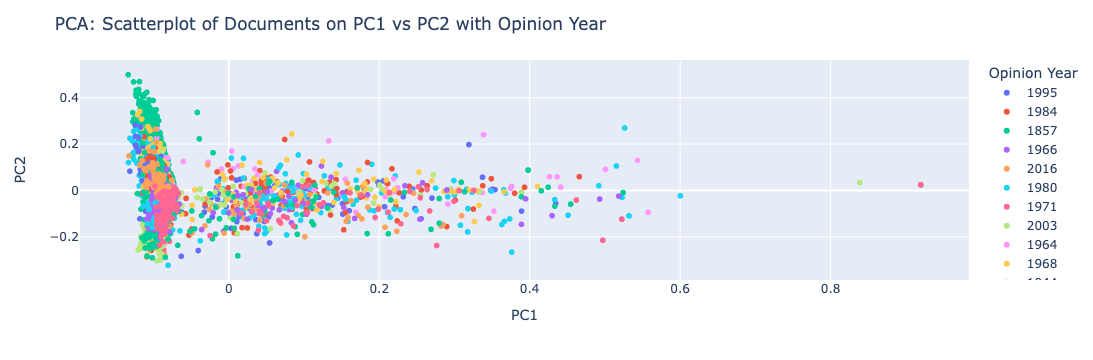

In [75]:
# Scatterplot of documents based on first two PCs
fig_docs = px.scatter(
    DCM, x='PC1', y='PC2', 
    color=DOC['opinion_year'],
    labels={"color": "Opinion Year"}
)
fig_docs.update_layout(title="PCA: Scatterplot of Documents on PC1 vs PC2 with Opinion Year")
fig_docs.show()

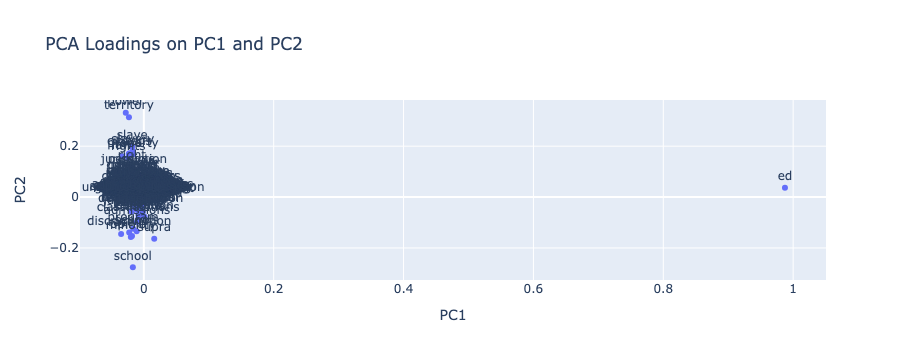

In [85]:
# Scatterplot of loadings for the first two components
fig_loadings = px.scatter(
    loadings, x='PC1', y='PC2',
    text=loadings.index, # Showing terms as labels on the plot
    title="PCA Loadings on PC1 and PC2"
)
fig_loadings.update_traces(textposition='top center')
fig_loadings.show()

## PCA Visualization 2

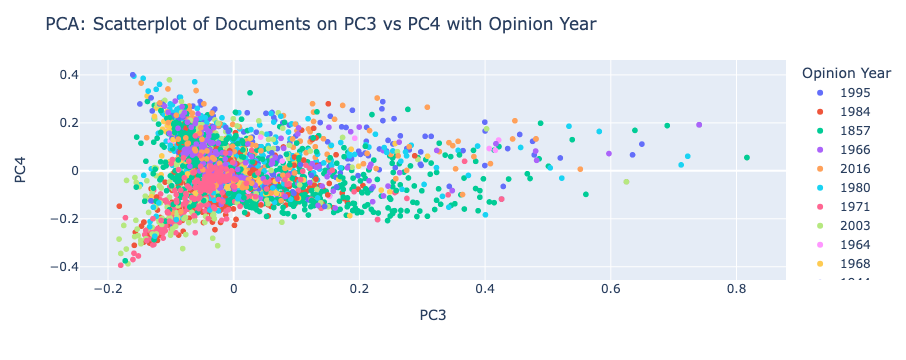

In [86]:
# Scatterplot of documents based on second two PCs
fig_docs = px.scatter(
    DCM, x='PC3', y='PC4', 
    color=DOC['opinion_year'],
    labels={"color": "Opinion Year"}
)
fig_docs.update_layout(title="PCA: Scatterplot of Documents on PC3 vs PC4 with Opinion Year")
fig_docs.show()

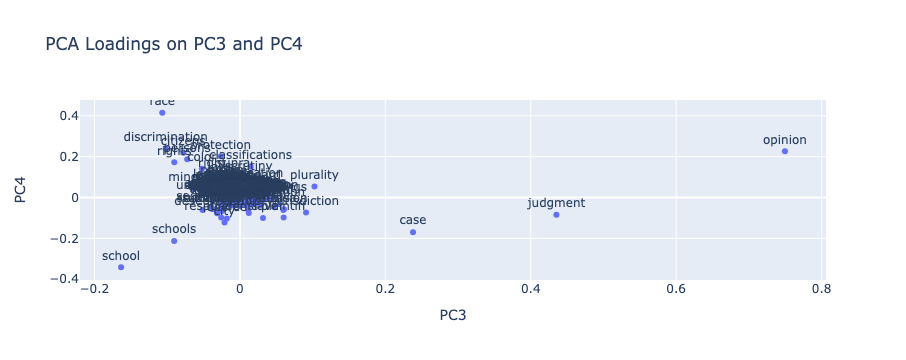

In [87]:
# Scatterplot of loadings for the first two components
fig_loadings = px.scatter(
    loadings, x='PC3', y='PC4',
    text=loadings.index, # Showing terms as labels on the plot
    title="PCA Loadings on PC3 and PC4"
)
fig_loadings.update_traces(textposition='top center')
fig_loadings.show()

## LDA Topic Modeling

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [82]:
ngram_range = (1, 2)
n_terms = 4000
n_topics = 40
max_iter = 20
n_top_terms = 9
colors = "YlGnBu"

In [83]:
lda_engine = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

### Create Vector Space

In [84]:
count_engine = CountVectorizer(max_features=n_terms, ngram_range=ngram_range, stop_words='english')
count_model = count_engine.fit_transform(DOC.doc_str)
TERMS = count_engine.get_feature_names_out()

## Topic Names

### Create TOPICS and get Top Terms per Topic

In [92]:
TOPICS = PHI.stack().groupby('topic_id')\
    .apply(lambda x: ' '.join(x.sort_values(ascending=False).head(n_top_terms).reset_index().term_str))\
    .to_frame('top_terms')

In [93]:
TOPICS

top_terms
topic_id                                                   
T00       states power territory congress united united ...
T01       court case judgment jurisdiction decision ques...
T02       fcc minority ownership commission policies bro...
T03       racial race political group classifications sc...
T04       id 106 106 ct evidence 90 emphasis petitioner ...
T05       jurors persons race court color state grand wh...
T06       court state ante higher institutions policies ...
T07       state action local order public authorities na...
T08       state laws law amendment rights right shall st...
T09       government constitution rights states federal ...
T10       jury negroes selection peremptory service evid...
T11       vote fifteenth ct fifteenth amendment party am...
T12       commerce interstate congress power metro metro...
T13       race program admissions bakke discrimination c...
T14       court decree respondents injunction relief dis...
T15       states united united states state citizens con...
T16       justice opinion dissenting concurring mr ct mr...
T17       city court negroes mobile negro whites cases l...
T18       state general university black district caroli...
T19       school schools board racially desegregation pu...
T20       public white private race races colored state ...
T21       state amendment fourteenth action fourteenth a...
T22       contract 1981 petitioner contracts employer ma...
T23       equal protection race equal protection virgini...
T24       plaintiff plea defendant facts cause new abate...
T25                   ct 2d ed ed 2d supra 96 1976 98 96 ct
T26       mbe program minority provision administrative ...
T27       equal protection equal protection clause prote...
T28       100 fullilove congress 100 ct ct id 448 cong c...
T29       slave state missouri master slavery free said ...
T30                   ct ed 2d ed 2d 97 93 97 ct 93 ct 1973
T31       minority business military order set act aside...
T32       court district district court appeals court ap...
T33       racial discrimination past racial discriminati...
T34       vi title vi federal title funds discrimination...
T35       law school law school students minority divers...
T36       act title rights discrimination congress civil...
T37       thirty act north congress act congress degrees...
T38       race property color city race color origin par...
T39       education board brown board education court af...

## Sort Topics by Doc Weight

In [94]:
TOPICS['doc_weight_sum'] = THETA.sum()
TOPICS['term_freq'] = PHI.sum(1) / PHI.sum(1).sum()

# Calculate the mean document weight for each topic
TOPICS['mean_doc_weight'] = TOPICS['doc_weight_sum'] / len(THETA)

In [95]:
TOPICS.sort_values('mean_doc_weight', ascending=False).style.background_gradient(cmap=colors)

In [112]:
# Exporting TOPICS
TOPICS.to_csv('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/TOPICS.csv', sep='|')

In [86]:
TNAMES = [f"T{str(x).zfill(len(str(n_topics)))}" for x in range(n_topics)]

## THETA

In [87]:
lda_model = lda_engine.fit_transform(count_model)

In [88]:
THETA = pd.DataFrame(lda_model, index=DOC.index)
THETA.columns.name = 'topic_id'
THETA.columns = TNAMES

In [89]:
THETA.sample(10).T.style.background_gradient(cmap=colors, axis=None)

In [96]:
# Exporting THETA
THETA.to_csv('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/THETA.csv', sep='|')

## PHI

In [90]:
PHI = pd.DataFrame(lda_engine.components_, columns=TERMS, index=TNAMES)
PHI.index.name = 'topic_id'
PHI.columns.name = 'term_str'

In [91]:
PHI.T.sample(10).style.background_gradient(cmap=colors, axis=None)

In [99]:
# Exporting PHI
PHI.to_csv('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/PHI.csv', sep='|')

## LDA + PCA Visualization

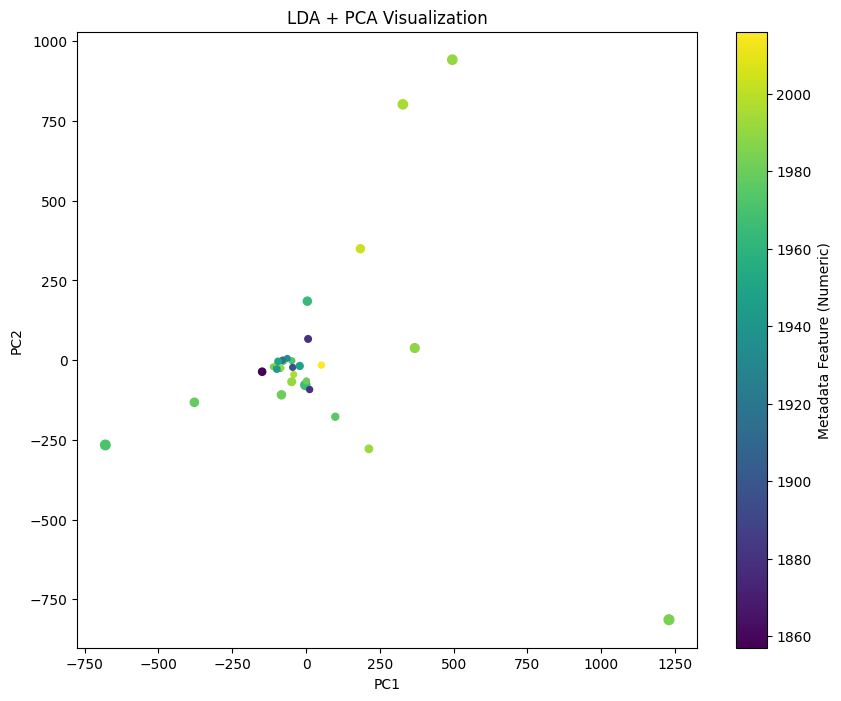

In [162]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to the PHI table
pca = PCA(n_components=2)
phi_pca = pca.fit_transform(PHI)

# Get mean document weight of each topic from THETA table
mean_doc_weight = THETA.mean(axis=0)

# Assuming you have a metadata feature from the LIB table named 'metadata_feature'
metadata_feature = LIB['opinion_year']

# Convert 'opinion_year' column to numeric values
metadata_feature_numeric = pd.to_numeric(metadata_feature, errors='coerce')

# Drop NaN values from metadata_feature_numeric and align indices
metadata_feature_numeric_cleaned = metadata_feature_numeric.dropna()
phi_pca_cleaned = phi_pca[:len(metadata_feature_numeric_cleaned)]

# Plotting with color mapping
plt.figure(figsize=(10, 8))
scatter = plt.scatter(phi_pca_cleaned[:, 0], phi_pca_cleaned[:, 1], s=mean_doc_weight[:len(metadata_feature_numeric_cleaned)] * 1000, c=metadata_feature_numeric_cleaned, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('LDA + PCA Visualization')
plt.colorbar(scatter, label='Metadata Feature (Numeric)')
plt.show()

## Sentiment Analysis

### Import NRC lexicon

### Get SA Lexicon

In [96]:
SALEX = pd.read_csv('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/salex_nrc.csv').set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]

In [97]:
SALEX

anger  anticipation  disgust  fear  joy  negative  positive  \
term_str                                                                   
abandon          0             0        0     1    0         1         0   
abandoned        1             0        0     1    0         1         0   
abandonment      1             0        0     1    0         1         0   
abduction        0             0        0     1    0         1         0   
aberration       0             0        1     0    0         1         0   
...            ...           ...      ...   ...  ...       ...       ...   
young            0             1        0     0    1         0         1   
youth            1             1        0     1    1         0         1   
zeal             0             1        0     0    1         0         1   
zealous          0             0        0     0    1         0         1   
zest             0             1        0     0    1         0         1   

             sadness  surprise  trust  sentiment  
term_str                                          
abandon            1         0      0         -1  
abandoned          1         0      0         -1  
abandonment        1         1      0         -1  
abduction          1         1      0         -1  
aberration         0         0      0         -1  
...              ...       ...    ...        ...  
young              0         1      0          1  
youth              0         1      0          1  
zeal               0         1      1          1  
zealous            0         0      1          1  
zest               0         0      1          1  

[3688 rows x 11 columns]

### Compute Sentiment

### Combine SALEX with VOCAB

In [98]:
VOCAB_SENT = pd.concat([VOCAB.reset_index().set_index('term_str'), SALEX], join='inner', axis=1)

In [99]:
VOCAB_SENT.head()

n  n_chars         p          i max_pos max_pos_group  n_pos  \
term_str                                                                     
abandon       6        7  0.000011  16.422599      VB            VB      3   
abandoned    10        9  0.000019  15.685633     VBN           VBN      3   
abandonment   7       11  0.000013  16.200206      NN            NN      1   
aberration    1       10  0.000002  19.007561      NN            NN      1   
abhorrent     1        9  0.000002  19.007561      NN            NN      1   

                     cat_pos  stop porter_stem  ...  anticipation  disgust  \
term_str                                        ...                          
abandon         {RB, JJ, VB}     0     abandon  ...             0        0   
abandoned    {VBD, NNP, VBN}     0     abandon  ...             0        0   
abandonment             {NN}     0     abandon  ...             0        0   
aberration              {NN}     0       aberr  ...             0        1   
abhorrent               {NN}     0      abhorr  ...             0        1   

             fear  joy  negative  positive  sadness  surprise  trust  \
term_str                                                               
abandon         1    0         1         0        1         0      0   
abandoned       1    0         1         0        1         0      0   
abandonment     1    0         1         0        1         1      0   
aberration      0    0         1         0        0         0      0   
abhorrent       1    0         1         0        0         0      0   

             sentiment  
term_str                
abandon             -1  
abandoned           -1  
abandonment         -1  
aberration          -1  
abhorrent           -1  

[5 rows x 24 columns]

In [124]:
# Exporting VOCAB_SENT
VOCAB_SENT.to_csv('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/VOCAB_SENT.csv', sep='|')

/Users/stephaniefissel/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:2540: RuntimeWarning:

invalid value encountered in cast



### Merge VOCAB with BOW

In [100]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust sentiment".split()

BOW_SENT = BOW.join(VOCAB_SENT[['max_pos'] + emo_cols], on='term_str', rsuffix='_v').dropna()
BOW_SENT

n     tfidf max_pos  anger  anticipation  \
case_id sec_num term_str                                                
1       1       government   1  2.024804     NNP    0.0           0.0   
                invasion     1  5.374708      NN    1.0           0.0   
        2       court        1  1.619339     NNP    1.0           1.0   
        3       congruence   1  5.087026      NN    0.0           0.0   
                consistency  1  5.087026      NN    0.0           0.0   
...                         ..       ...     ...    ...           ...   
33      153     remedy       1  2.932361      NN    0.0           1.0   
                succeed      1  5.087026      VB    0.0           1.0   
                turmoil      1  7.166468      NN    1.0           0.0   
                university   1  3.088930     NNP    0.0           1.0   
                white        1  2.475120      JJ    0.0           1.0   

                             disgust  fear  joy  sadness  surprise  trust  \
case_id sec_num term_str                                                    
1       1       government       0.0   1.0  0.0      0.0       0.0    0.0   
                invasion         0.0   0.0  0.0      0.0       0.0    0.0   
        2       court            0.0   1.0  0.0      0.0       0.0    0.0   
        3       congruence       0.0   0.0  0.0      0.0       0.0    1.0   
                consistency      0.0   0.0  0.0      0.0       0.0    1.0   
...                              ...   ...  ...      ...       ...    ...   
33      153     remedy           0.0   0.0  1.0      0.0       0.0    1.0   
                succeed          0.0   0.0  1.0      0.0       1.0    1.0   
                turmoil          0.0   1.0  0.0      1.0       0.0    0.0   
                university       0.0   0.0  0.0      0.0       0.0    0.0   
                white            0.0   0.0  1.0      0.0       0.0    1.0   

                             sentiment  
case_id sec_num term_str                
1       1       government        -1.0  
                invasion          -1.0  
        2       court              0.0  
        3       congruence         1.0  
                consistency        1.0  
...                                ...  
33      153     remedy             1.0  
                succeed            1.0  
                turmoil           -1.0  
                university         1.0  
                white              1.0  

[25101 rows x 12 columns]

In [101]:
# Exporting BOW_SENT
BOW_SENT.to_csv('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/BOW_SENT.csv', sep='|')

### Computed sentiment per bag computed from BOW_SENT

In [102]:
# Compute sentiment per bag
DOC_SENT = BOW_SENT.groupby(['case_id', 'sec_num']).apply(lambda x: (x['tfidf'] * x['sentiment']).sum()).reset_index(name='sentiment_per_bag')

DOC_SENT

case_id  sec_num  sentiment_per_bag
0           1        1          -7.399512
1           1        2           0.000000
2           1        3           8.569962
3           1        4          -2.161004
4           1        5           1.861070
...       ...      ...                ...
4691       33      147          -4.083242
4692       33      148          -6.420112
4693       33      150           9.266791
4694       33      152           8.020999
4695       33      153          27.100244

[4696 rows x 3 columns]

In [103]:
# Exporting DOC_SENT
DOC_SENT.to_csv('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/DOC_SENT.csv', sep='|')

## Sentiment Plot

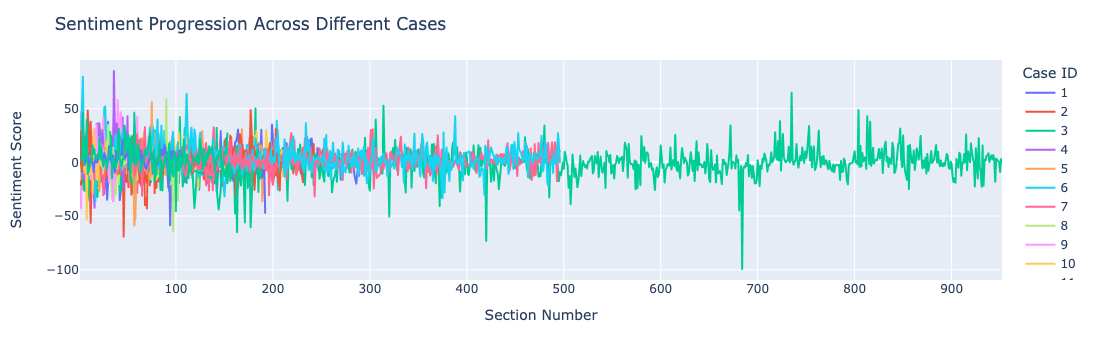

In [98]:
import plotly.express as px

# Plot for interactive case selection
fig = px.line(DOC_SENT, x='sec_num', y='sentiment_per_bag', color='case_id', labels={'sec_num': 'Section Number', 'sentiment_per_bag': 'Sentiment Score', 'case_id': 'Case ID'})
fig.update_layout(title='Sentiment Progression Across Different Cases',
                  xaxis_title='Section Number',
                  yaxis_title='Sentiment Score')
fig.show()


## A table of word2vec features associated with terms in the VOCAB table.

In [104]:
BAG = OHCO[:2]

In [105]:
# word2vec parameters
w2v_params = dict(
    window = 5,
    vector_size = 246,
    min_count = 50, # THIS LIMITS OUR VOCAB
    workers = 4
)

#### Convert to Gensim

In [106]:
from gensim.models import word2vec
from gensim.corpora import Dictionary
from sklearn.manifold import TSNE as tsne
import gensim

In [107]:
docs = CORPUS[~CORPUS.pos.str.match('NNPS?')].dropna(subset=['term_str'])\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
docs = [doc for doc in docs if len(doc) > 1] # Lose single word docs

In [108]:
print(docs[:2])

[['has', 'standing', 'to', 'seek', 'forward-looking', 'relief', '.', 'it', 'has', 'met', 'the', 'requirements', 'necessary', 'to', 'maintain', 'its', 'claim', 'by', 'alleging', 'an', 'invasion', 'of', 'a', 'legally', 'protected', 'interest', 'in', 'a', 'particularized', 'manner', ',', 'and', 'by', 'showing', 'that', 'it', 'is', 'very', 'likely', 'to', 'bid', ',', 'in', 'the', 'relatively', 'near', 'future', ',', 'on', 'another', 'contract', 'offering', 'financial', 'incentives', 'to', 'a', 'prime', 'contractor', 'for', 'hiring', 'disadvantaged', 'subcontractors', '.'], ['all', 'racial', 'classifications', ',', 'imposed', 'by', 'whatever', 'federal', ',', 'state', ',', 'or', 'local', 'governmental', 'actor', ',', 'must', 'be', 'analyzed', 'by', 'a', 'reviewing', 'court', 'under', 'strict', 'scrutiny', '.', '.', '____', '.']]


In [109]:
vocab = Dictionary(docs)

#### Generate word embeddings with Gensim's module

In [110]:
model = word2vec.Word2Vec(docs, **w2v_params)

In [111]:
model.wv.vectors

array([[-0.31561527, -0.13515684, -0.03632861, ...,  0.02680502,
         0.41118237,  0.58435315],
       [ 0.04492241, -0.30457613,  0.15788954, ...,  0.17773391,
        -0.28745636, -0.07410537],
       [ 0.26219982, -0.12670195,  0.11225861, ..., -0.2279474 ,
        -0.22594784,  0.15878493],
       ...,
       [ 0.05749869, -0.07317612,  0.01673225, ..., -0.04474742,
         0.07687097,  0.01922816],
       [ 0.06268475, -0.11278317,  0.05017587, ...,  0.01315979,
         0.08533993,  0.00950568],
       [ 0.00855266, -0.08879853,  0.00429374, ..., -0.00918135,
         0.00791664,  0.06491794]], dtype=float32)

#### Convert model to data frame

In [112]:
def get_vector(row):
    w = row.name
    try:
        vec = model.wv[w]
    except KeyError as e:
        vec = None
    return vec

In [113]:
WV = pd.DataFrame(VOCAB.apply(get_vector, axis=1).dropna()).apply(lambda x: pd.Series(x[0]), axis=1)

In [114]:
WV

0         1         2         3         4         5    \
term_str                                                               
1        -0.628693 -0.032341 -0.231049  0.391225 -0.602403 -0.097550   
10       -0.243562 -0.034293 -0.185096  0.230261 -0.436303 -0.329020   
100      -0.357626 -0.220951 -0.333922  0.334872 -0.781189 -0.633010   
106      -0.246203 -0.134785 -0.160216  0.194821 -0.459742 -0.309018   
109      -0.192440 -0.158081 -0.128120  0.208253 -0.436405 -0.329418   
...            ...       ...       ...       ...       ...       ...   
would     0.011381 -0.438391 -0.207420 -0.594736  0.432983  0.057099   
writ     -0.037925 -0.076625  0.231610  0.002752 -0.002249 -0.050135   
year     -0.059796 -0.028117  0.047997  0.131807 -0.233853 -0.243732   
years    -0.120579 -0.067019  0.185961  0.076033 -0.369964 -0.330715   
yet      -0.032479 -0.129479  0.012666 -0.166977 -0.045963 -0.194248   

               6         7         8         9    ...       236       237  \
term_str                                          ...                       
1         0.071734  0.238677 -0.167339 -0.440409  ...  0.193138 -0.327500   
10        0.073276  0.111132 -0.144045 -0.196730  ...  0.118118 -0.103526   
100       0.265388  0.213796 -0.115826 -0.363401  ...  0.269083 -0.402976   
106       0.167663  0.153473 -0.031693 -0.247883  ...  0.174335 -0.242833   
109       0.131159  0.135830 -0.059355 -0.245390  ...  0.113820 -0.206274   
...            ...       ...       ...       ...  ...       ...       ...   
would     0.080517  0.456938  0.005817 -0.620665  ... -0.309206  0.718169   
writ     -0.133461 -0.016492  0.030942 -0.331976  ... -0.078966  0.000741   
year     -0.193391 -0.052942 -0.111159 -0.249695  ... -0.041915  0.037708   
years    -0.414971 -0.215493 -0.237021 -0.313542  ... -0.013233 -0.003930   
yet      -0.174132 -0.114291 -0.083659 -0.202596  ... -0.030369  0.090989   

               238       239       240       241       242       243  \
term_str                                                               
1        -0.216138  0.085501 -0.300590 -0.473608  0.127356 -0.047068   
10       -0.019393  0.072935 -0.072916 -0.220629  0.012962  0.007608   
100      -0.019280  0.068085 -0.241531 -0.404360  0.057893  0.145822   
106      -0.035756  0.084618 -0.208958 -0.235317  0.090324  0.097023   
109      -0.060075  0.063186 -0.119196 -0.256636  0.101848  0.068763   
...            ...       ...       ...       ...       ...       ...   
would    -0.223092  0.658592 -0.412534  0.308074  0.546588  0.120336   
writ     -0.113707  0.055545 -0.008980 -0.157671  0.246776  0.051233   
year     -0.037808  0.118510  0.054602 -0.303701  0.049098 -0.024195   
years     0.123860  0.197298  0.064900 -0.382094 -0.029406 -0.022697   
yet       0.027393  0.115430 -0.013188 -0.115779  0.118606 -0.001534   

               244       245  
term_str                      
1         0.391205  0.290807  
10        0.231264  0.175083  
100       0.556940  0.401587  
106       0.267526  0.277708  
109       0.307575  0.259093  
...            ...       ...  
would    -0.016648 -0.061902  
writ     -0.018051  0.153232  
year      0.079200  0.139530  
years    -0.020912  0.160038  
yet       0.012655  0.150521  

[977 rows x 246 columns]

In [150]:
# Exporting WV
WV.to_csv('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/MSDS/DS5001/txts/VOCAB_W2V.csv', sep='|')

## Use ScikitLearn's TSNE library

In [115]:
from sklearn.manifold import TSNE as tsne

In [116]:
tsne_engine = tsne(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)

In [117]:
tsne_model = tsne_engine.fit_transform(WV.to_numpy())

In [118]:
TSNE = pd.DataFrame(tsne_model, columns=['x','y'], index=WV.index)

In [119]:
TSNE

x          y
term_str                      
1         40.072231  21.752066
10        39.241096  17.424927
100       42.424232  17.222637
106       40.324657  16.728104
109       40.153336  16.177242
...             ...        ...
would     28.338591 -11.542174
writ      17.238983  17.020628
year       7.044863   4.868572
years      7.299194   5.332006
yet       16.081041  -3.793885

[977 rows x 2 columns]

In [130]:
# Plot the coordinates
X = TSNE.join(VOCAB, how='left')
# Replace NaN values in 'dfidf' column with 0
X['dfidf'].fillna(0, inplace=True)

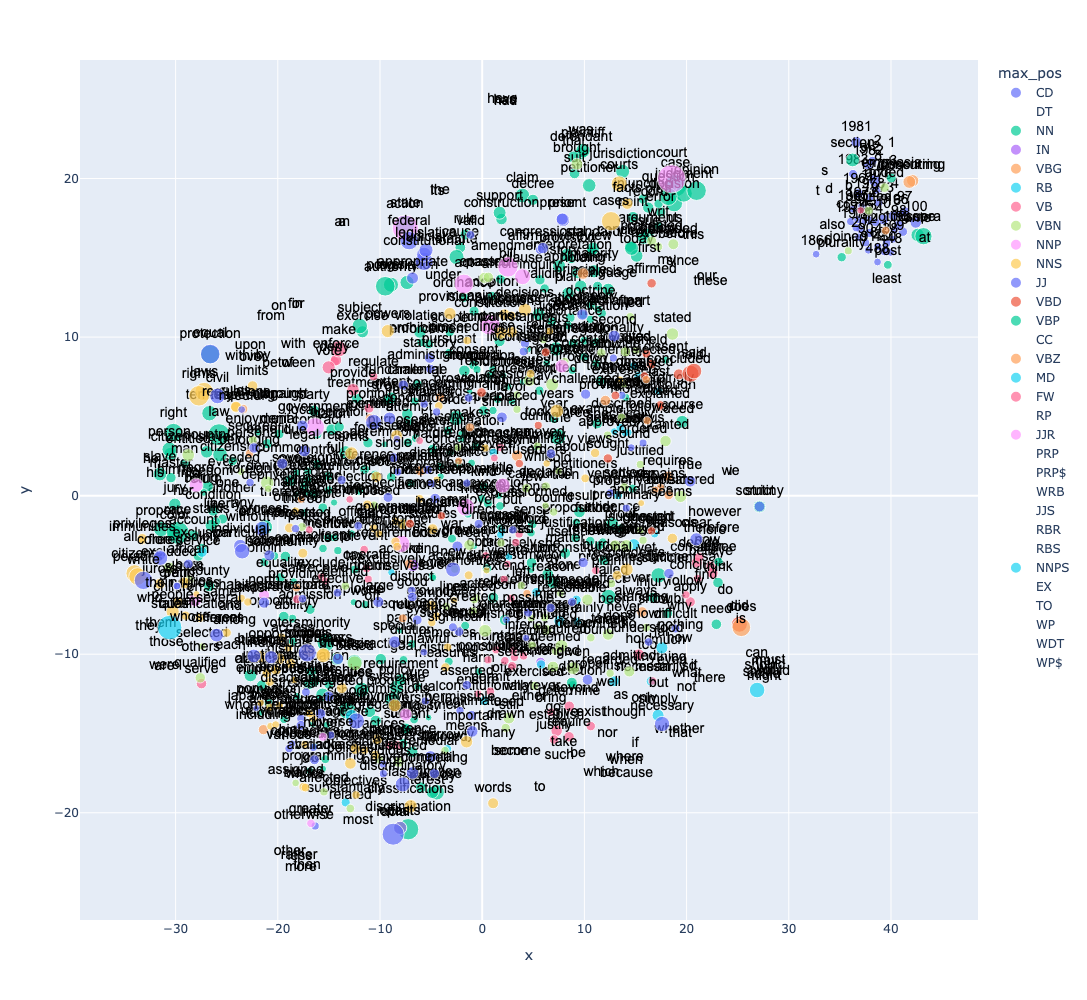

In [131]:
import plotly_express as px 
px.scatter(X.reset_index(), 'x', 'y', 
           text='term_str', 
           color='max_pos', 
           hover_name='term_str',          
           size='dfidf',
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

## Riff 1

/Users/stephaniefissel/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



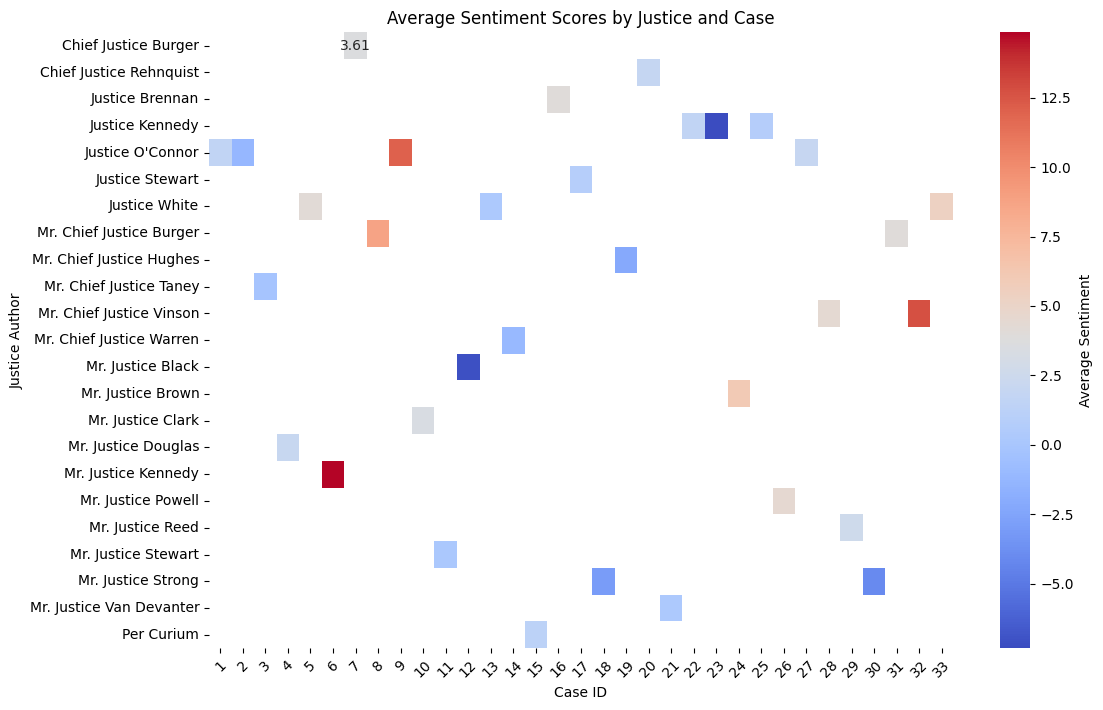

In [218]:
import seaborn as sns

# Add sentiment scores to DOC from DOC_SENT:
DOC = DOC.join(DOC_SENT.set_index(['case_id', 'sec_num']), on=['case_id', 'sec_num'])

# Grouping by justice and case to calculate the average sentiment per case per justice:
justice_sentiment = DOC.groupby(['justice_author', 'case_id']).sentiment_per_bag.mean().unstack()

# Plotting the heatmap:
plt.figure(figsize=(12, 8))
sns.heatmap(justice_sentiment, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Average Sentiment'})
plt.title('Average Sentiment Scores by Justice and Case')
plt.xlabel('Case ID')
plt.ylabel('Justice Author')
plt.xticks(rotation=45) 
plt.show()

## Riff 2

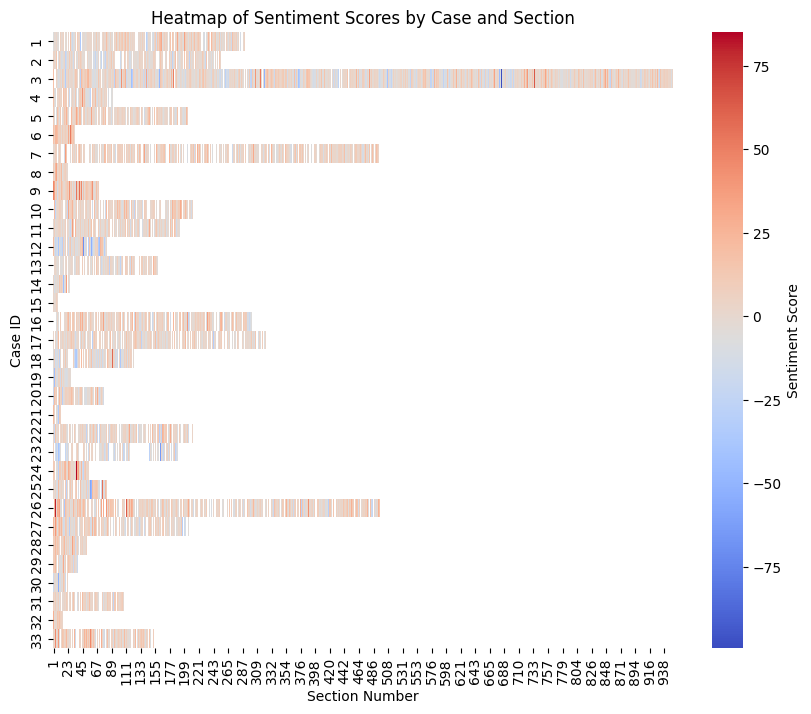

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = DOC_SENT.pivot(index="case_id", columns="sec_num", values="sentiment_per_bag")
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=False, cmap="coolwarm", cbar_kws={'label': 'Sentiment Score'})
plt.title('Heatmap of Sentiment Scores by Case and Section')
plt.xlabel('Section Number')
plt.ylabel('Case ID')
plt.show()

## Riff 3

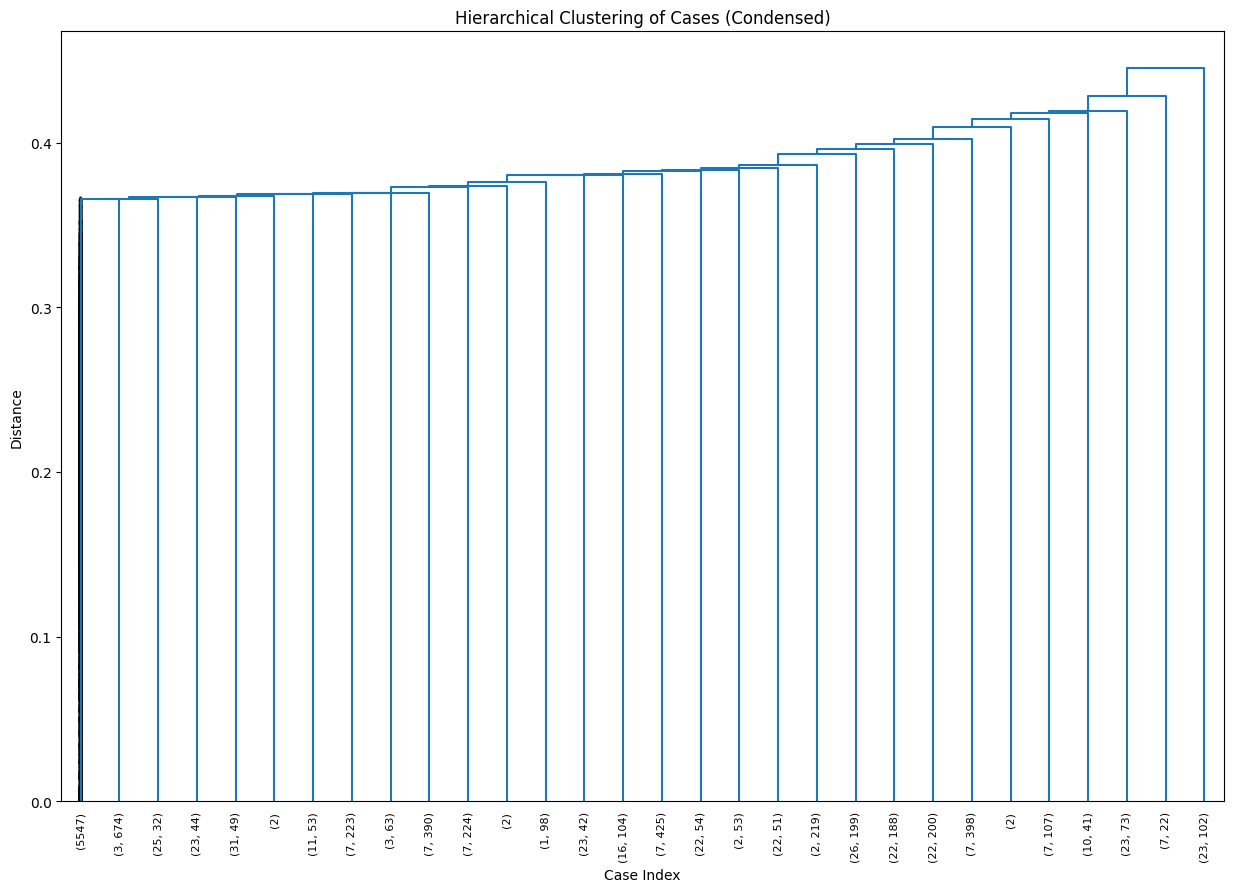

In [205]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(THETA, 'single')

plt.figure(figsize=(15, 10))
dendrogram(linked,
           truncate_mode='lastp',  # Only show the last 'p' merged clusters
           p=30,                   # Show the last 30 formed clusters
           show_leaf_counts=True,
           show_contracted=True,   # To see the distribution within the condensed branches
           orientation='top',
           labels=THETA.index,
           distance_sort='descending')

plt.title('Hierarchical Clustering of Cases (Condensed)')
plt.xlabel('Case Index')
plt.ylabel('Distance')
plt.xticks(rotation=90, fontsize=8)
plt.show()